In [1]:
import random
import math    
import copy    
import numpy as np
import matplotlib.pyplot as plt
from PID import PID
import Medidas
import PSO
import pandas as pd

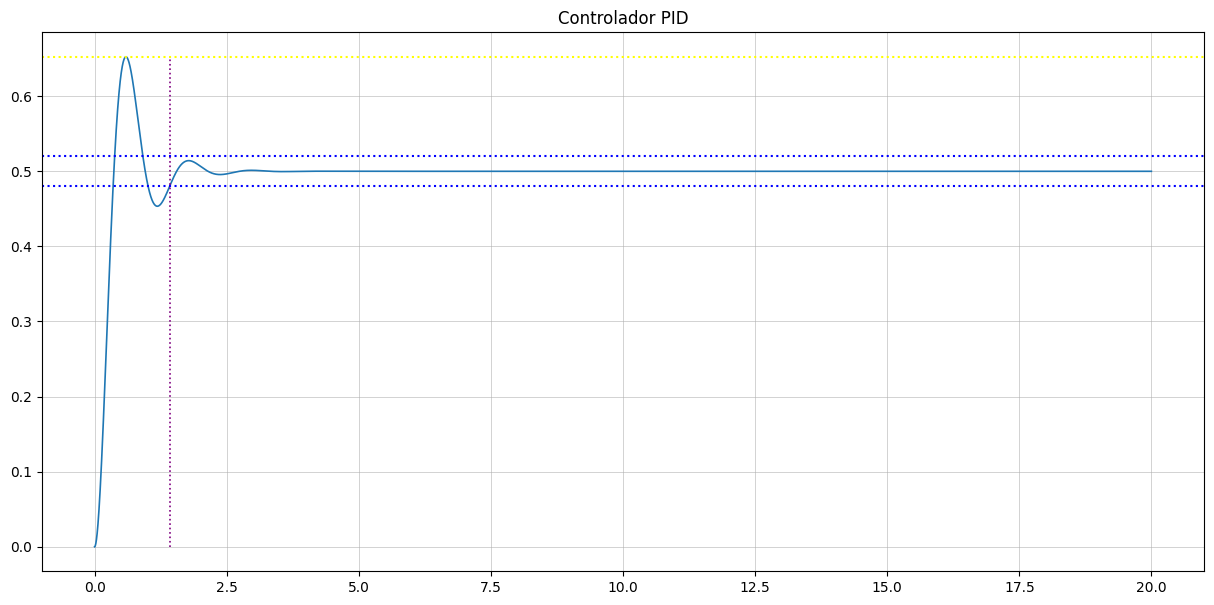

In [2]:
num = [16]
den = [1,4,16]
set_point = 1.0

erro = list()
pid_param = list()

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)

pid = PID(num,den)

erro.append(Medidas.Tempo_Acomodacao(pid_param, ma= True))
erro.append(Medidas.Overshoot(pid_param, ma = True))

Y, T = pid.resposta_MA()

pid.plot_MA(Y, T, erro)

In [3]:
def sistema2df(sistema,path):
    iteracao = list()
    feature = list()
    passarinho = 0

    columns = ["P","I","D","P_pbest","I_pbest","D_pbest","P_gbest","I_gbest","D_gbest","V_p","V_i","V_d","erro","erro_gbest"]

    for passarinho in range(10):
        iteracao = list()
        for iter in range(len(sistema)):
            feature = list()

            feature.append(copy.deepcopy(sistema[iter][passarinho].X[0]))
            feature.append(sistema[iter][passarinho].X[1])
            feature.append(sistema[iter][passarinho].X[2])
            feature.append(sistema[iter][passarinho].pbest[0])
            feature.append(sistema[iter][passarinho].pbest[1])
            feature.append(sistema[iter][passarinho].pbest[2])
            feature.append(sistema[iter][passarinho].gbest[0])
            feature.append(sistema[iter][passarinho].gbest[1])
            feature.append(sistema[iter][passarinho].gbest[2])
            feature.append(sistema[iter][passarinho].V[0])
            feature.append(sistema[iter][passarinho].V[1])
            feature.append(sistema[iter][passarinho].V[2])
            feature.append(sistema[iter][passarinho].erro)
            feature.append(sistema[iter][passarinho].erro_gbest)
            
            iteracao.append(feature)
        
        df = pd.DataFrame(iteracao, columns=columns)
        new_path = path + "/passarinho" + str(passarinho) + ".csv"
        df.to_csv(new_path)

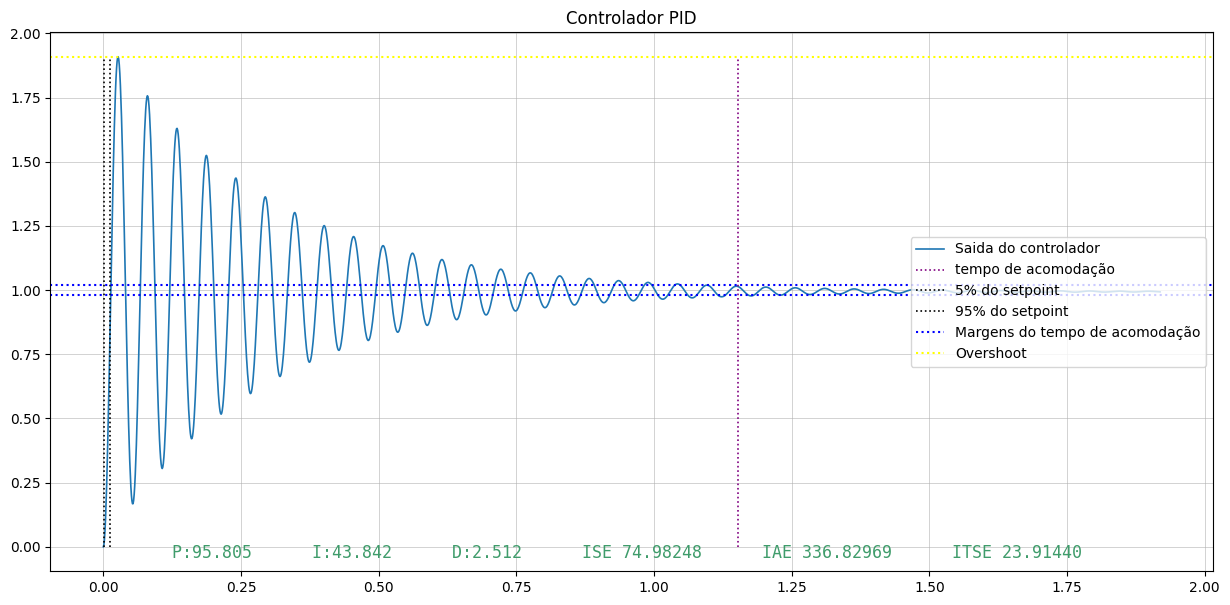

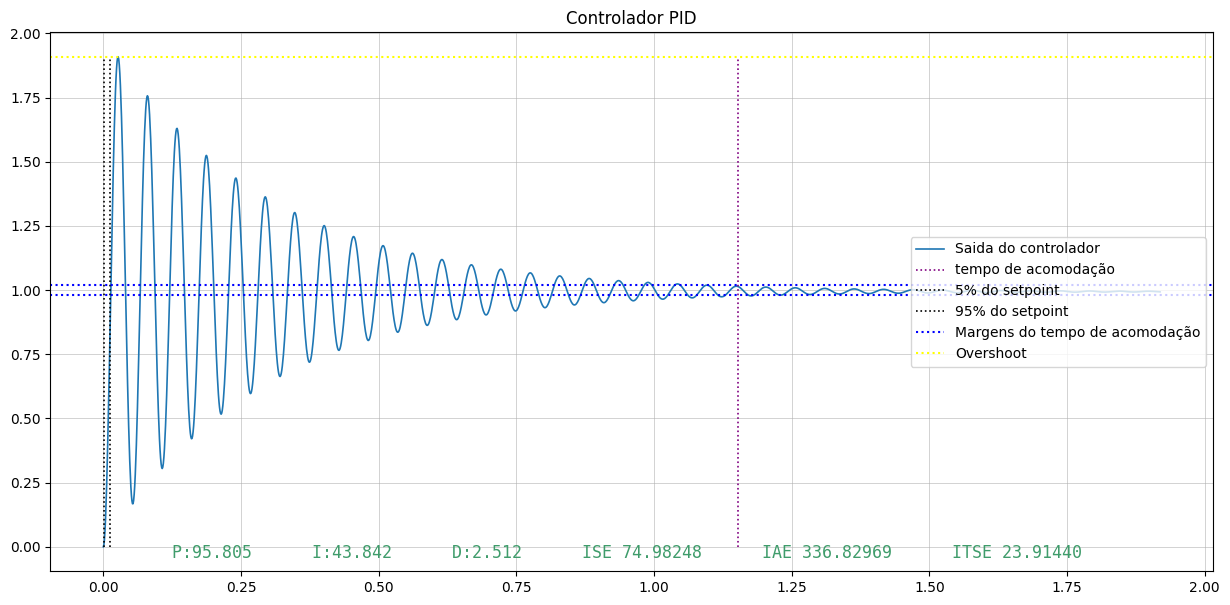

C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\control\timeresp.py:1049: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\control\timeresp.py:1049: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
c:\Users\vitor\Documents\GitHub\IC-IT\Medidas.py:34: RuntimeWarning: overflow encountered in square
  particula.erro = sum(particula.erro ** 2)
c:\Users\vitor\Documents\GitHub\IC-IT\Medidas.py:34: RuntimeWarning: overflow encountered in scalar add
  particula.erro = sum(particula.erro ** 2)
c:\Users\vitor\Documents\GitHub\IC-IT\Medidas.py:23: RuntimeWarning: overflow encountered in square
  erro = sum(erro ** 2)
c:\Users\vitor\Documents\GitHub\IC-IT\Medidas.py:23: RuntimeWarning: overflow encounter

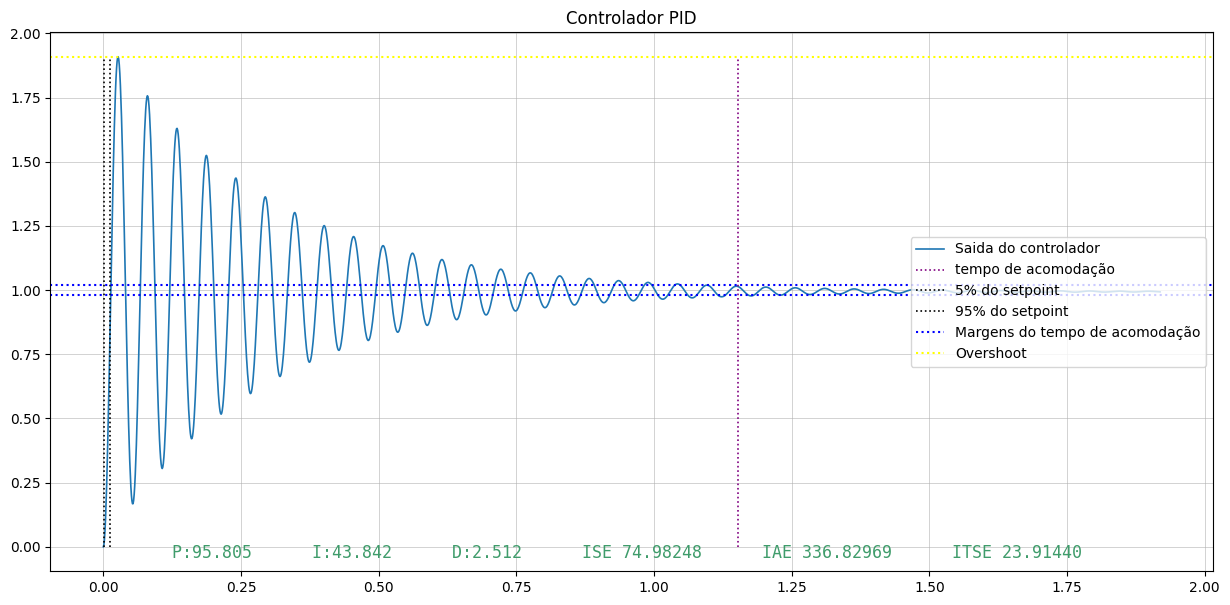

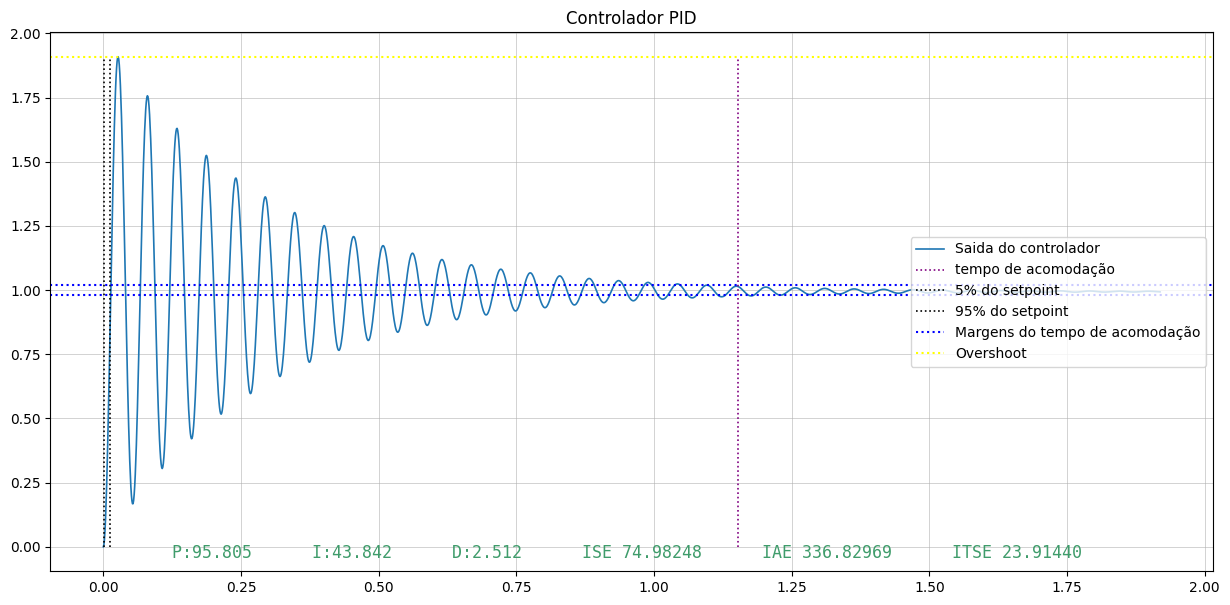

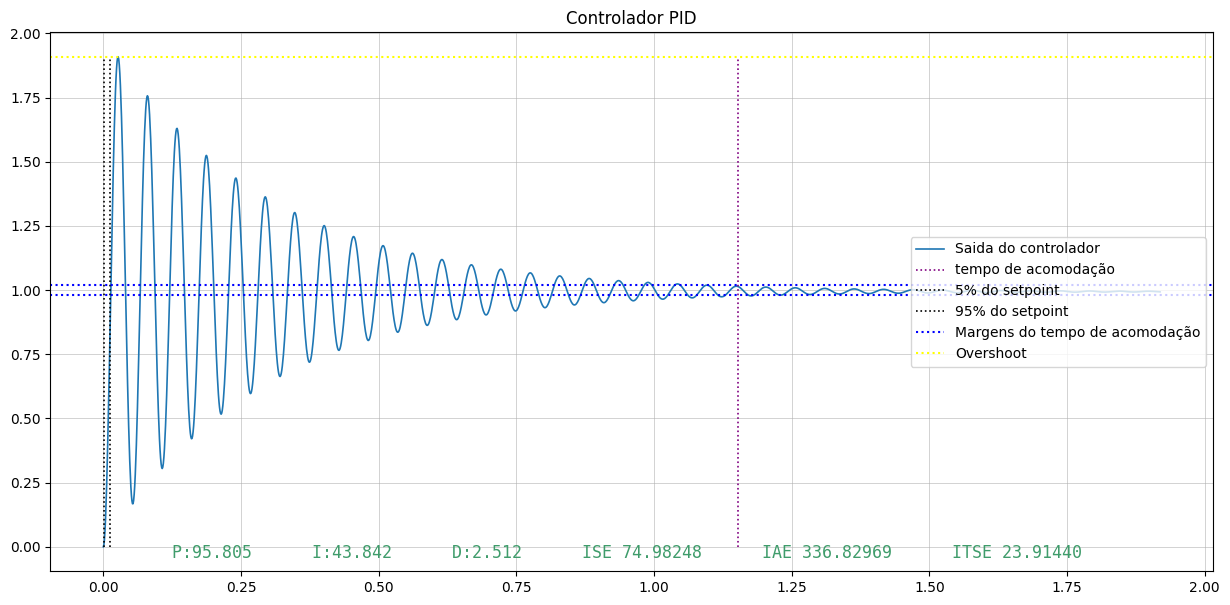

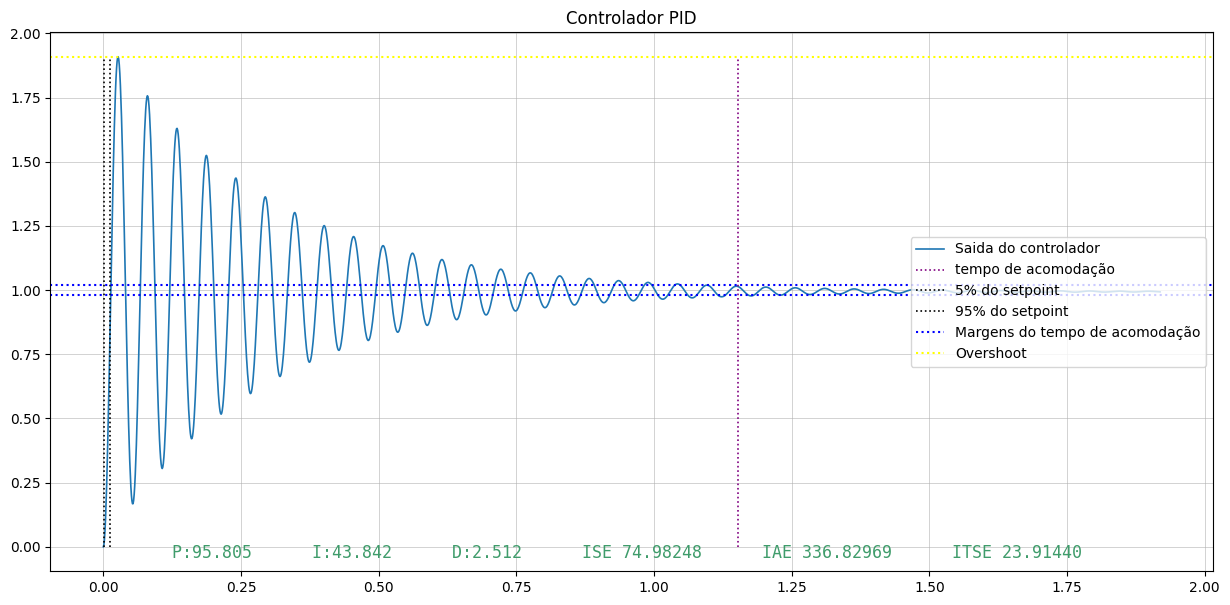

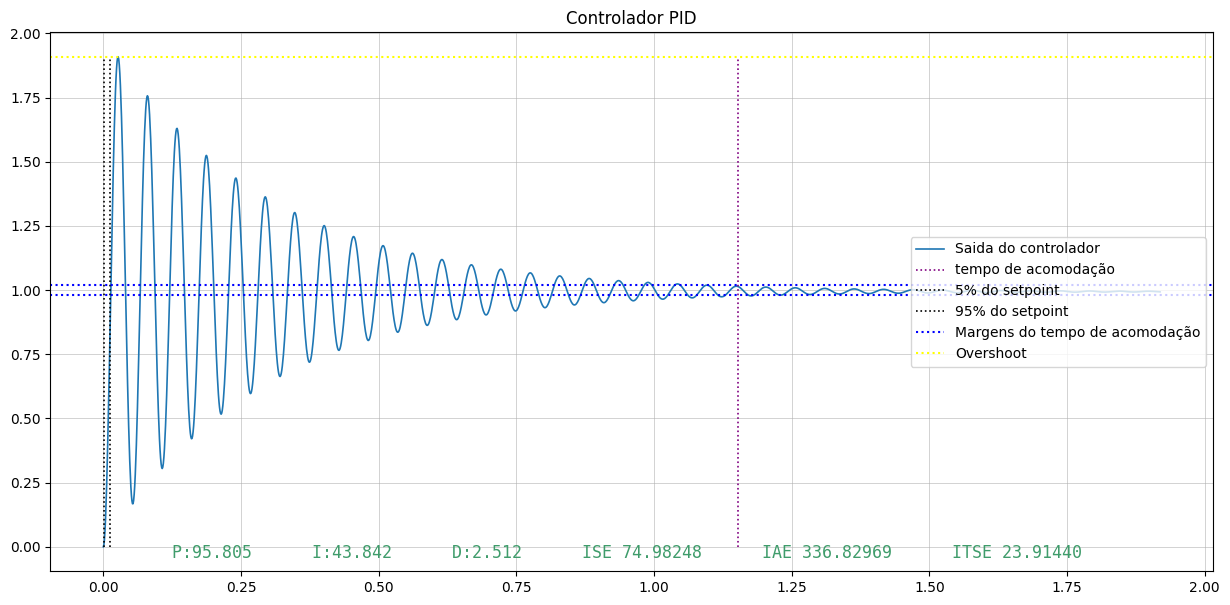

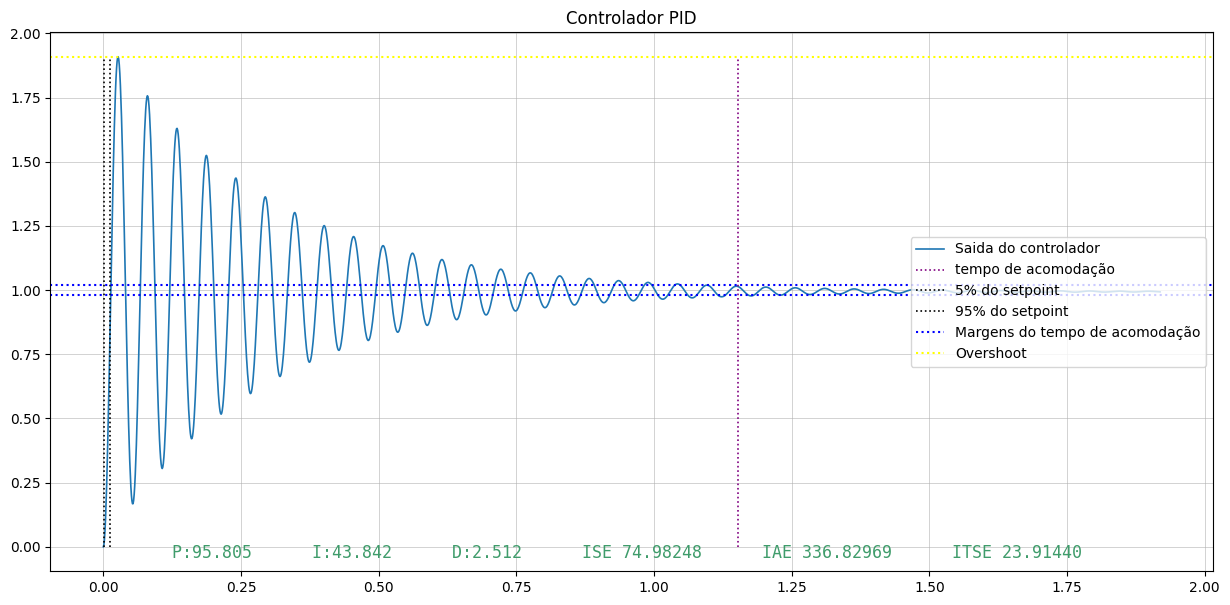

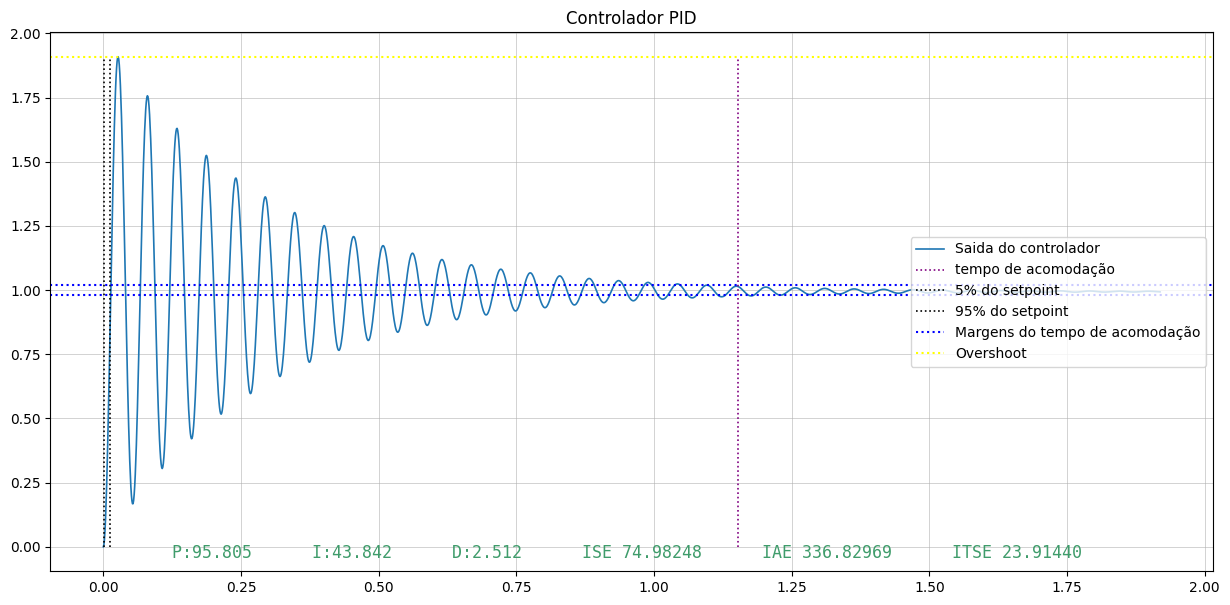

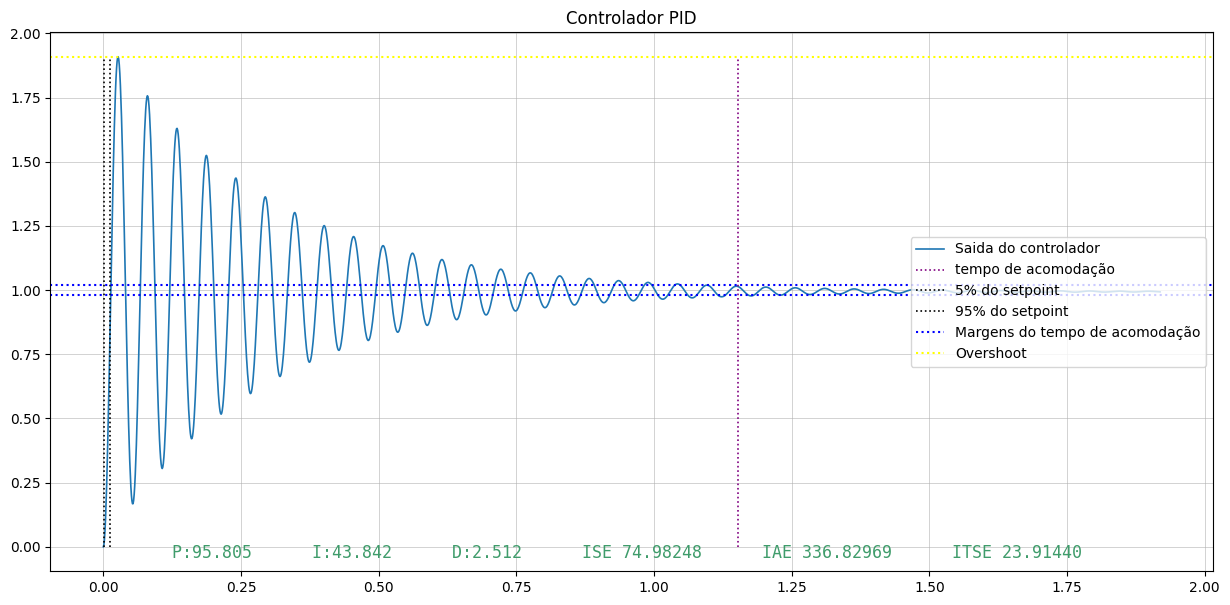

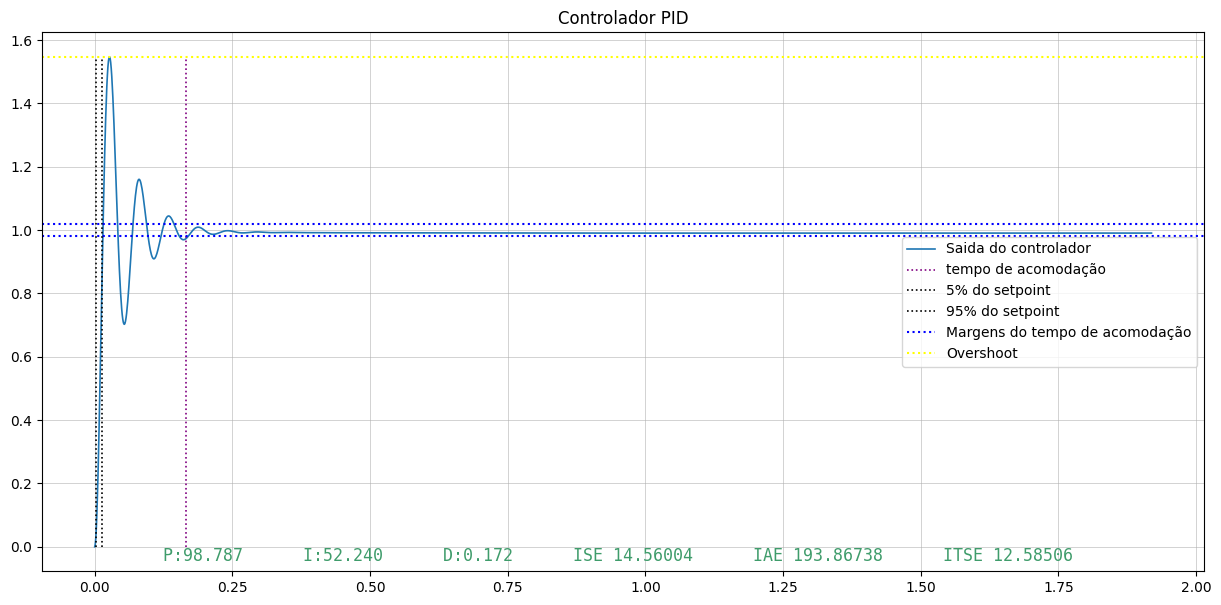

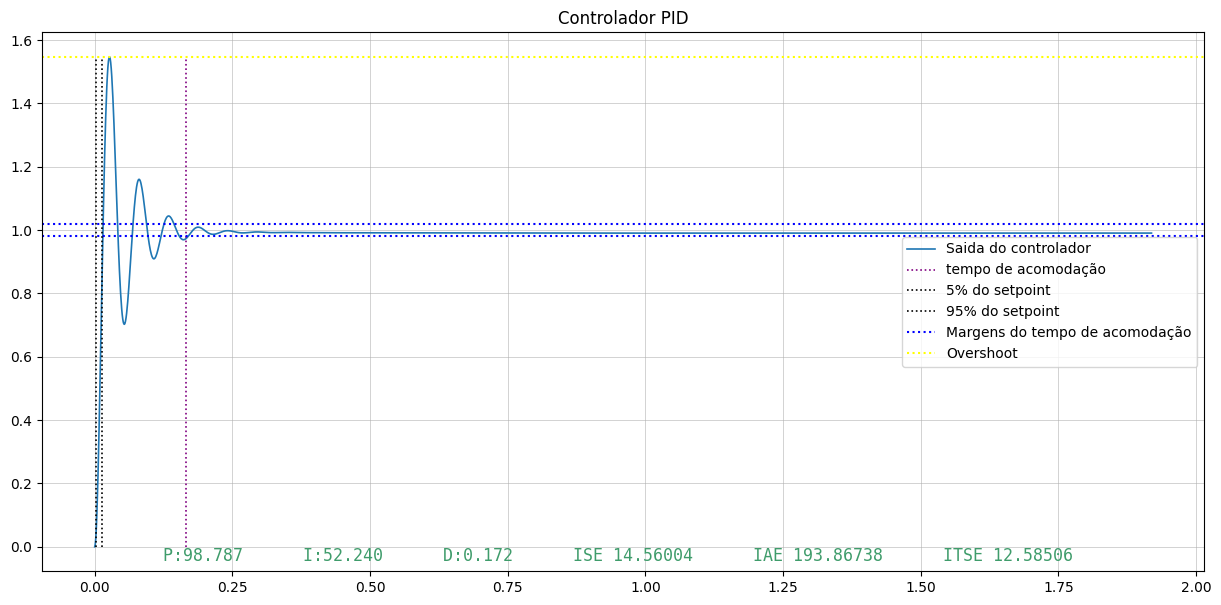

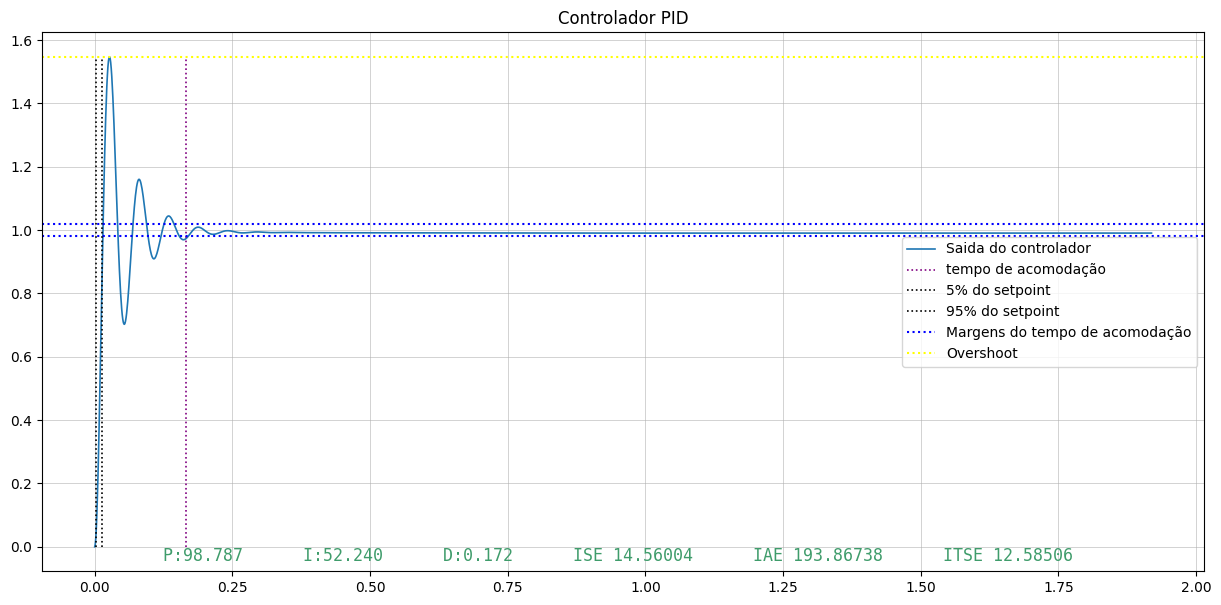

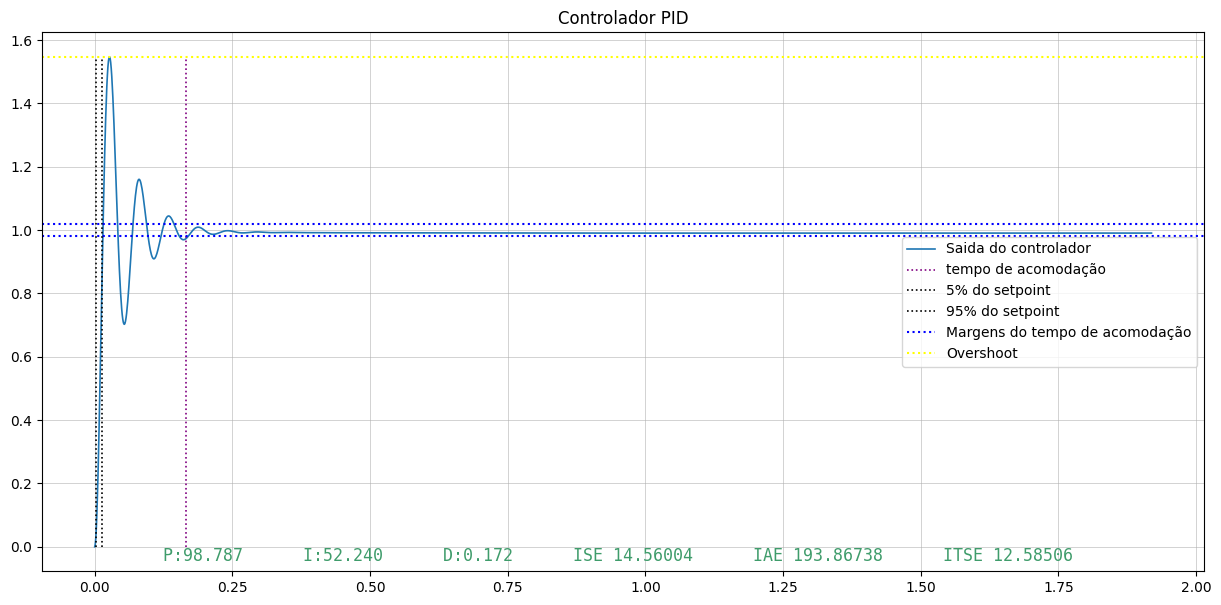

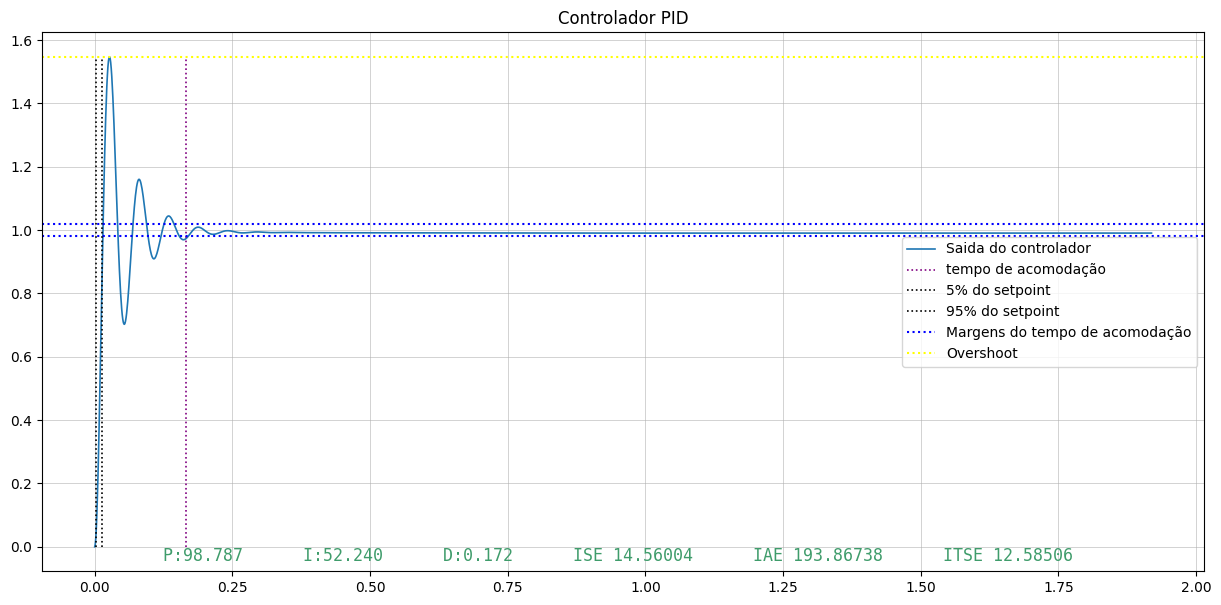

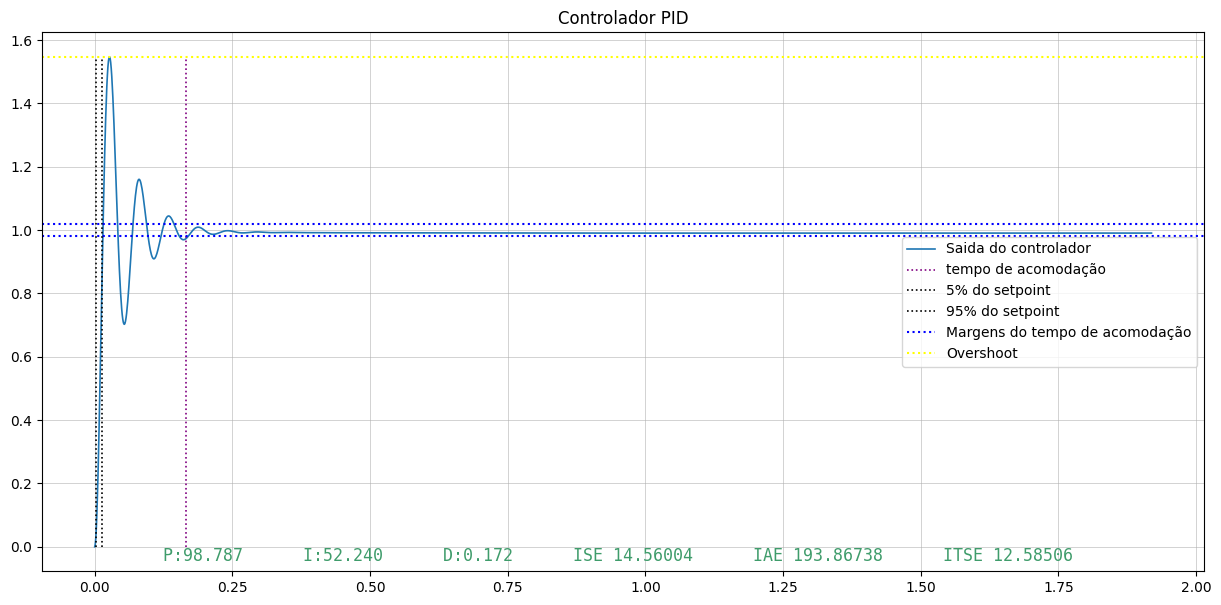

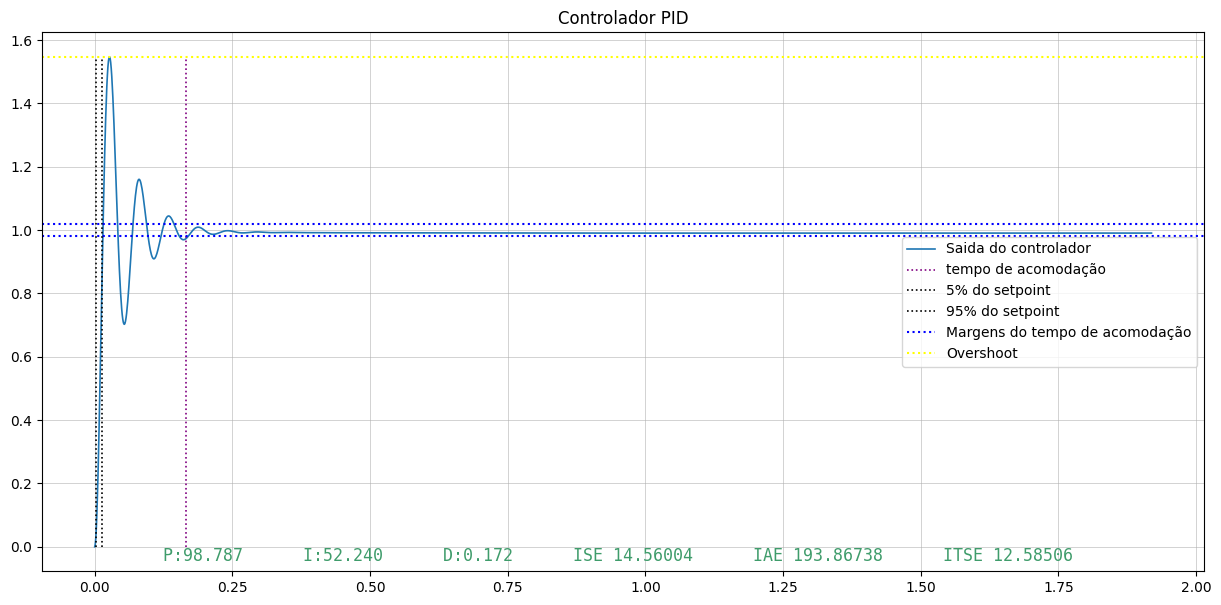

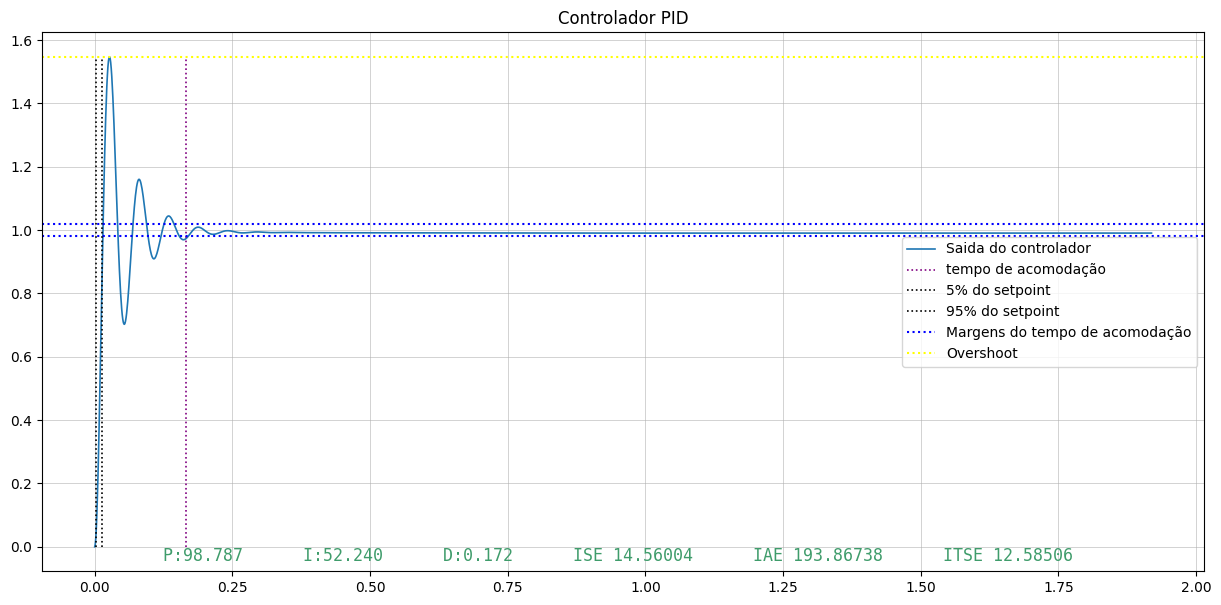

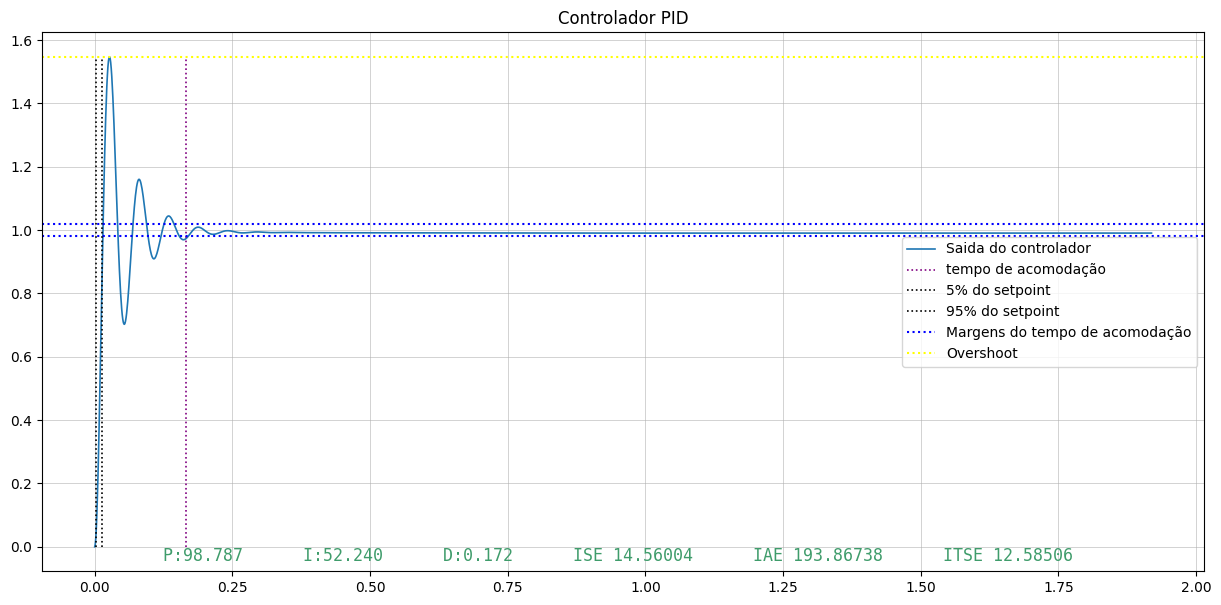

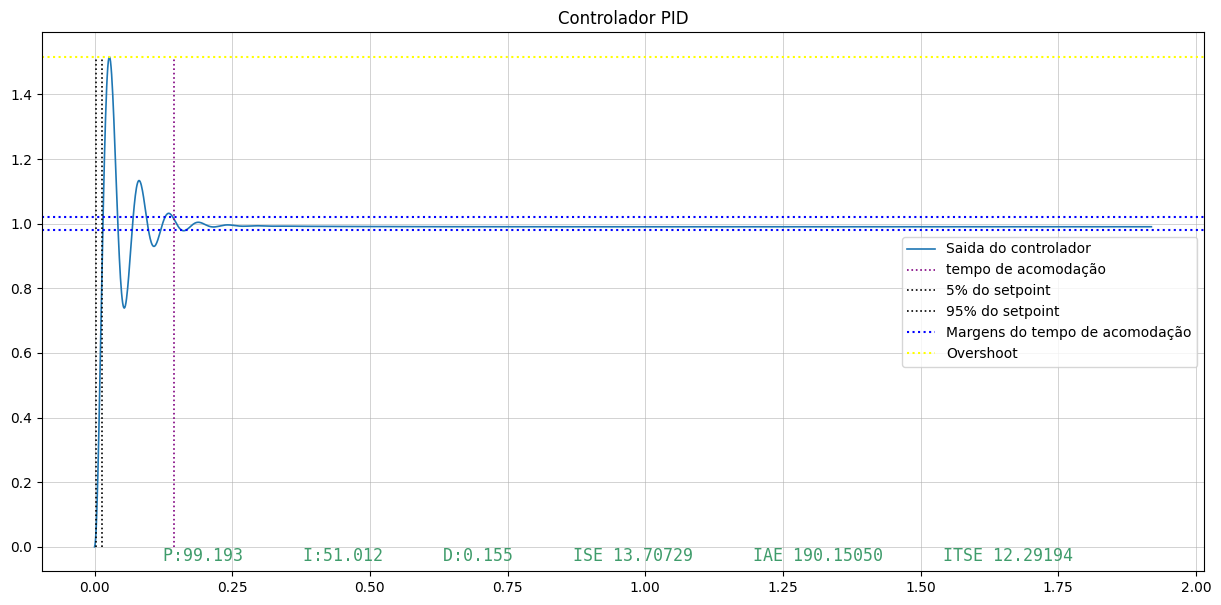

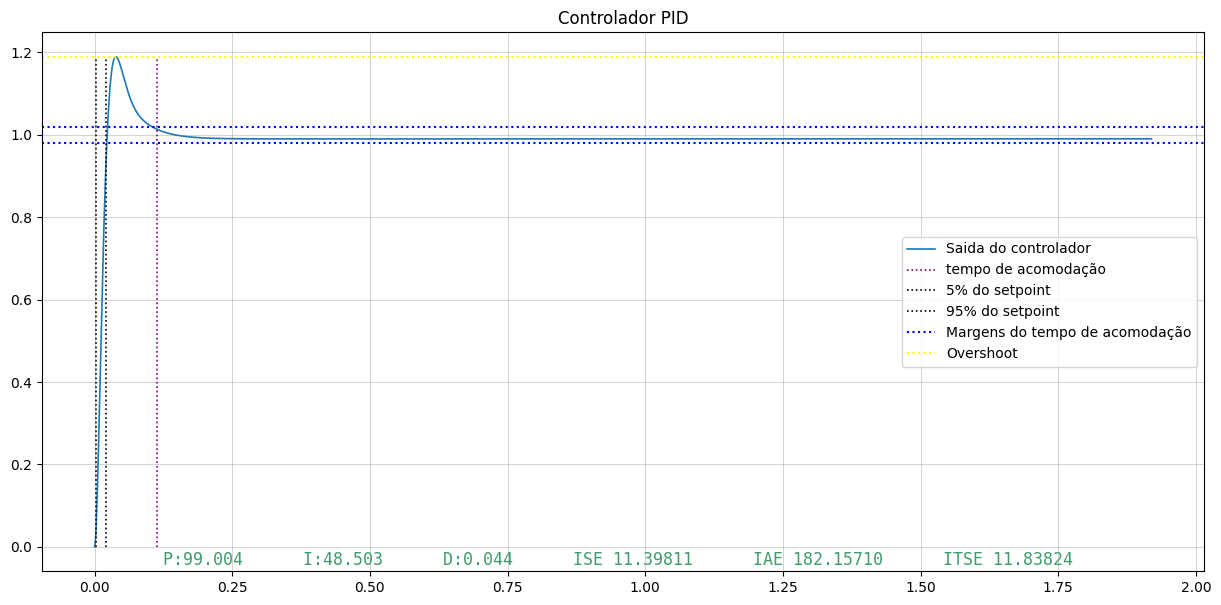

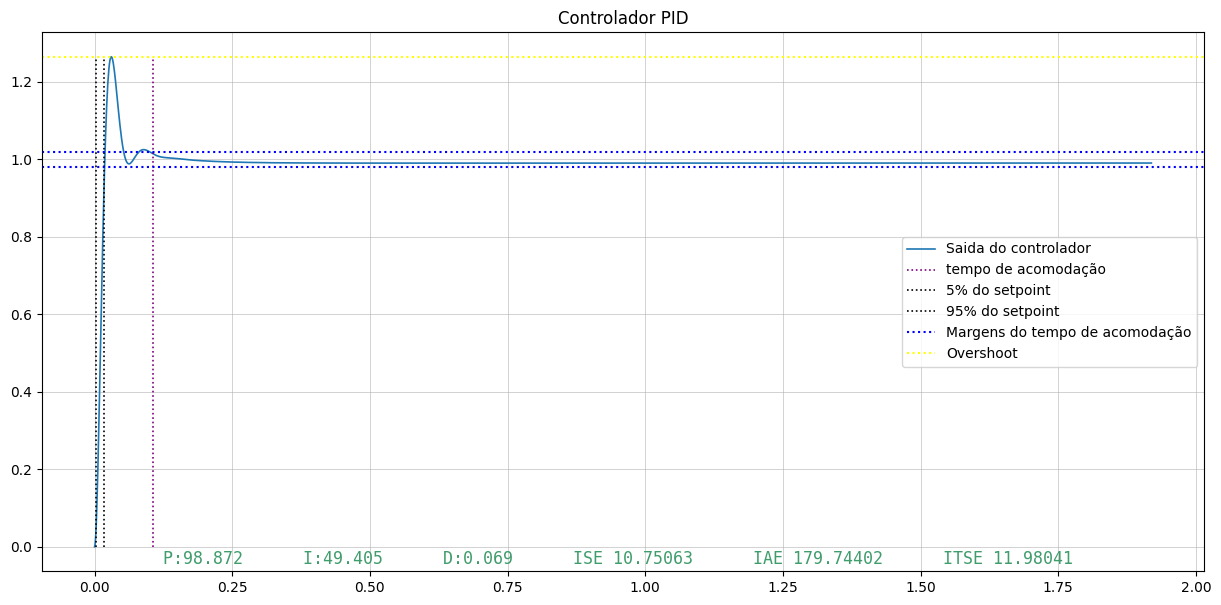

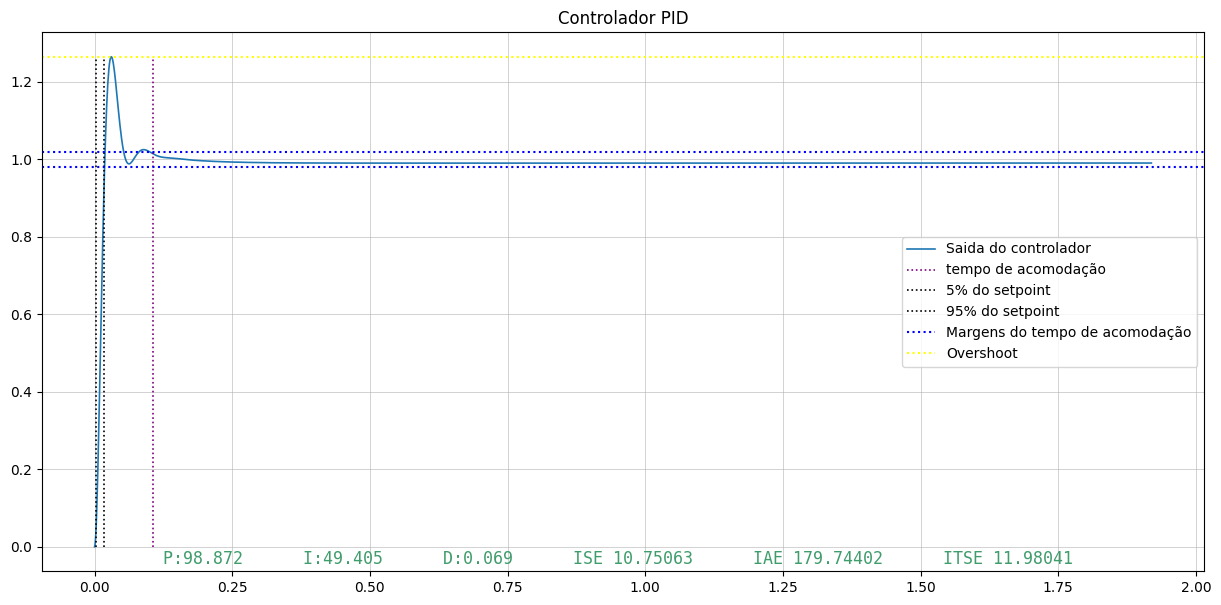

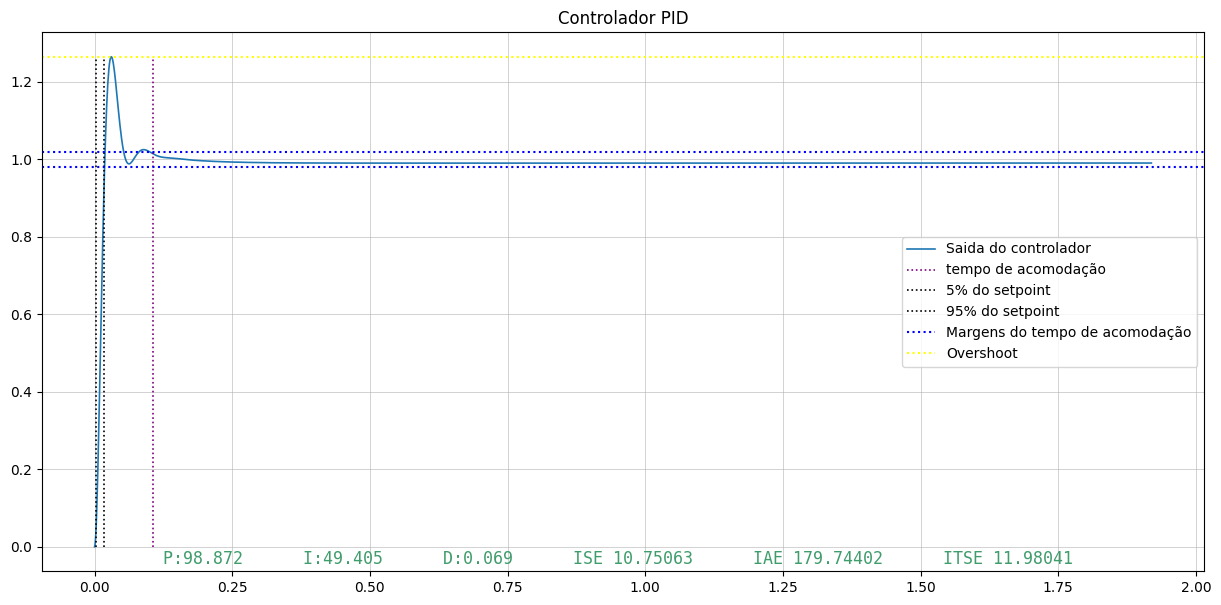

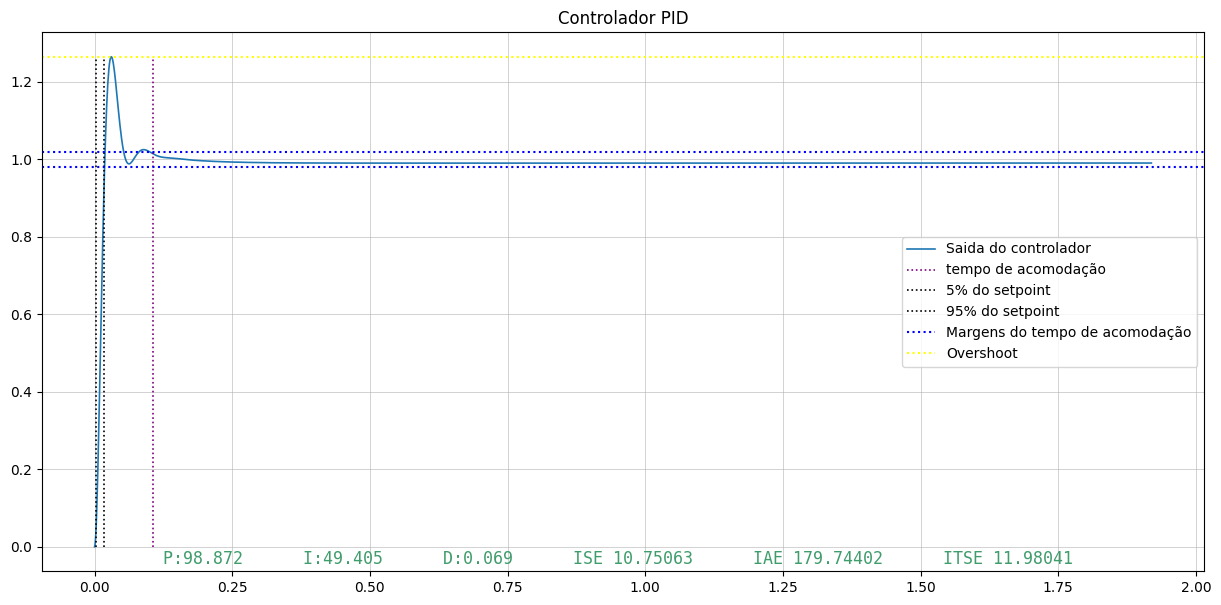

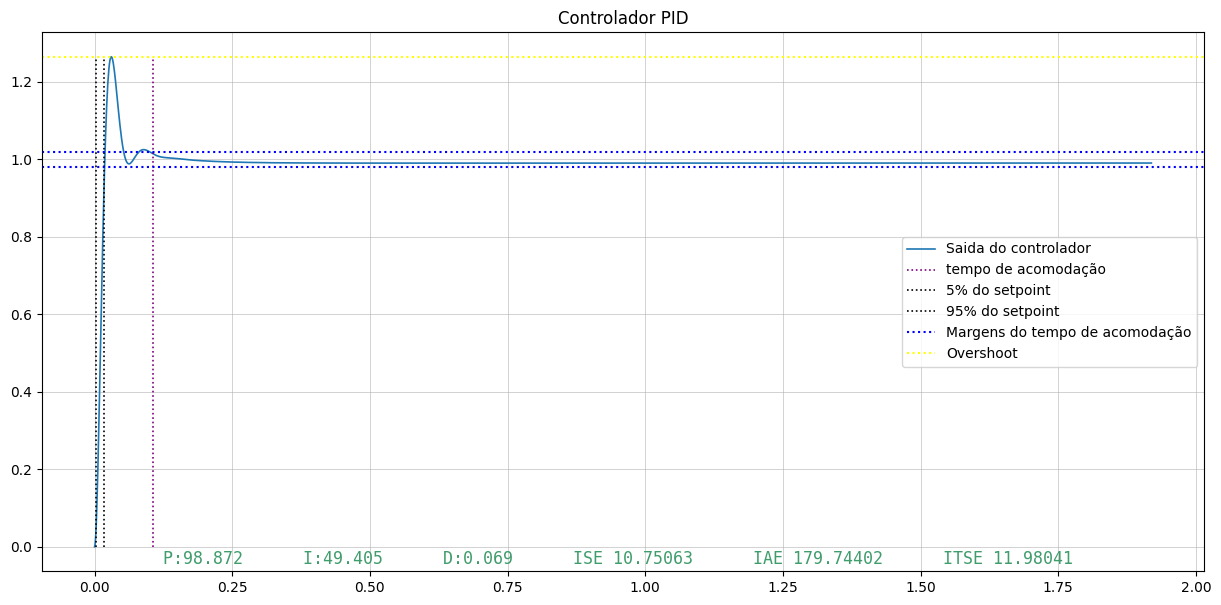

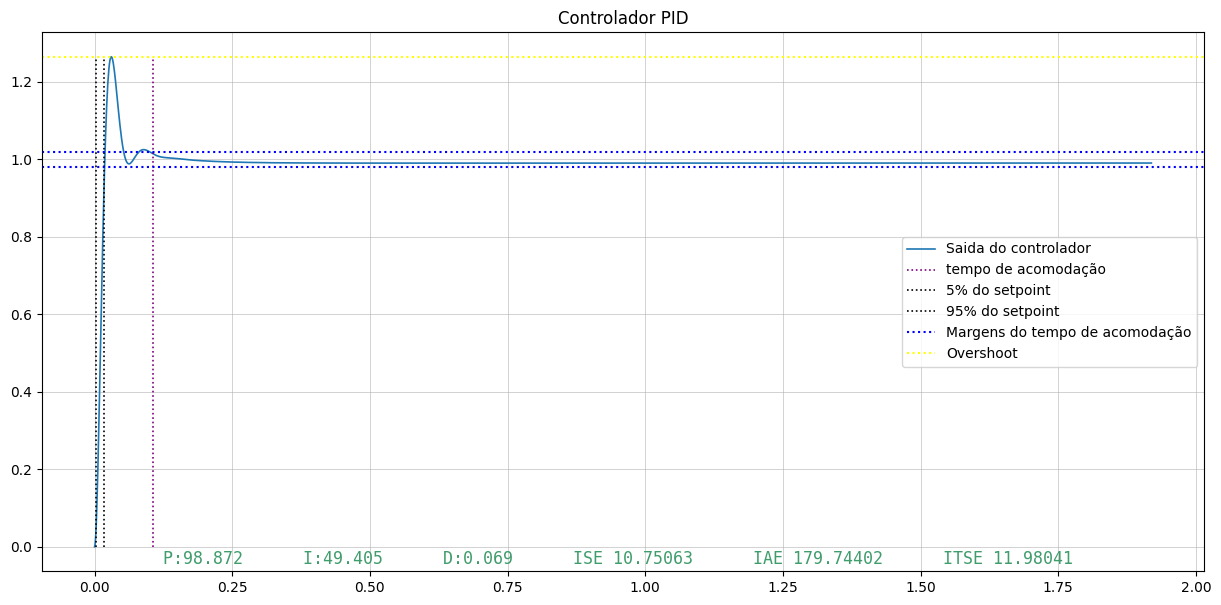

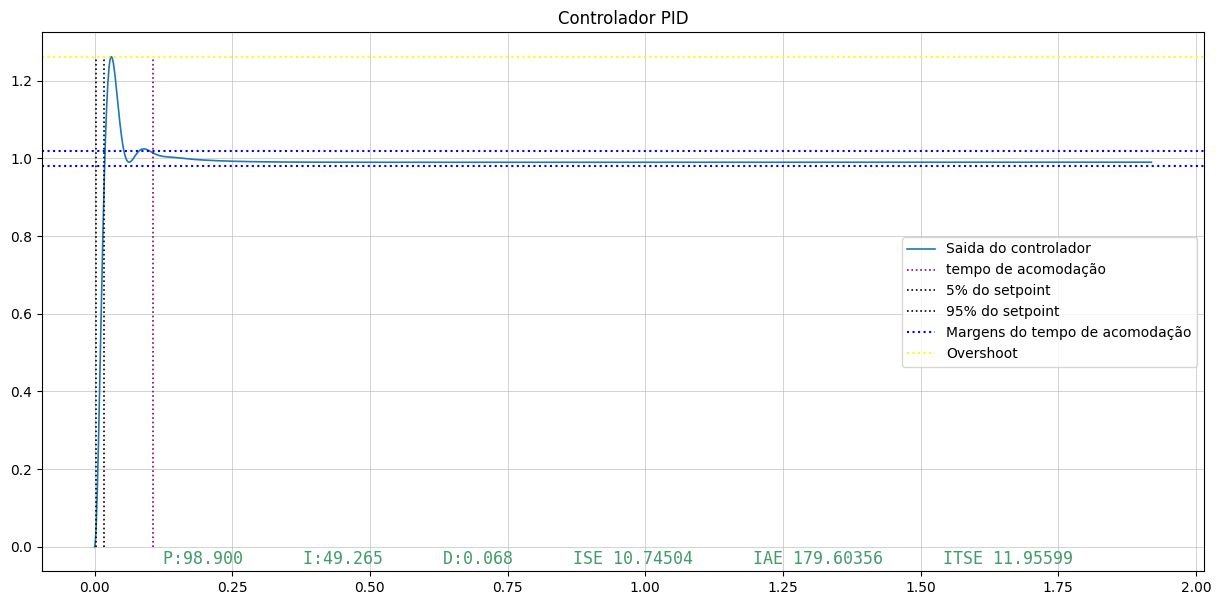

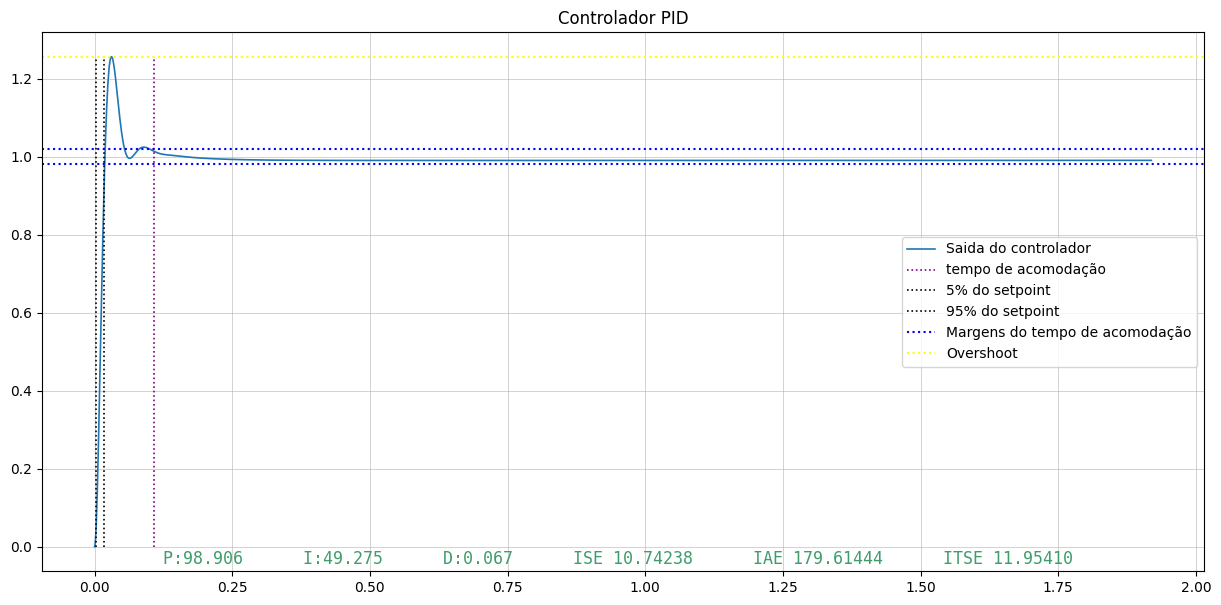

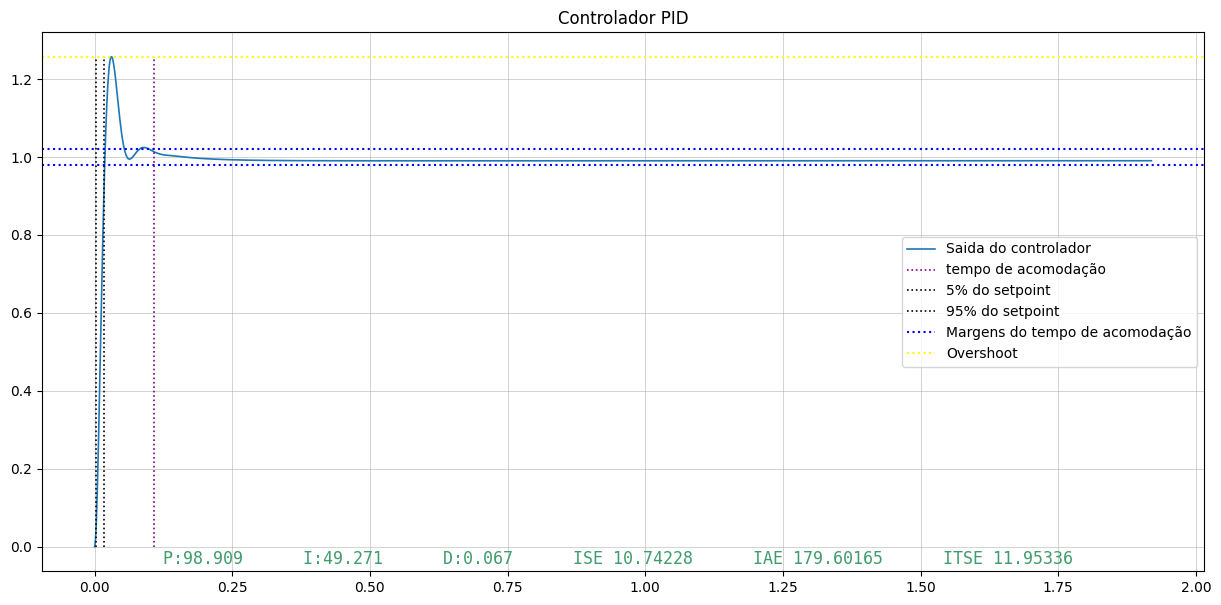

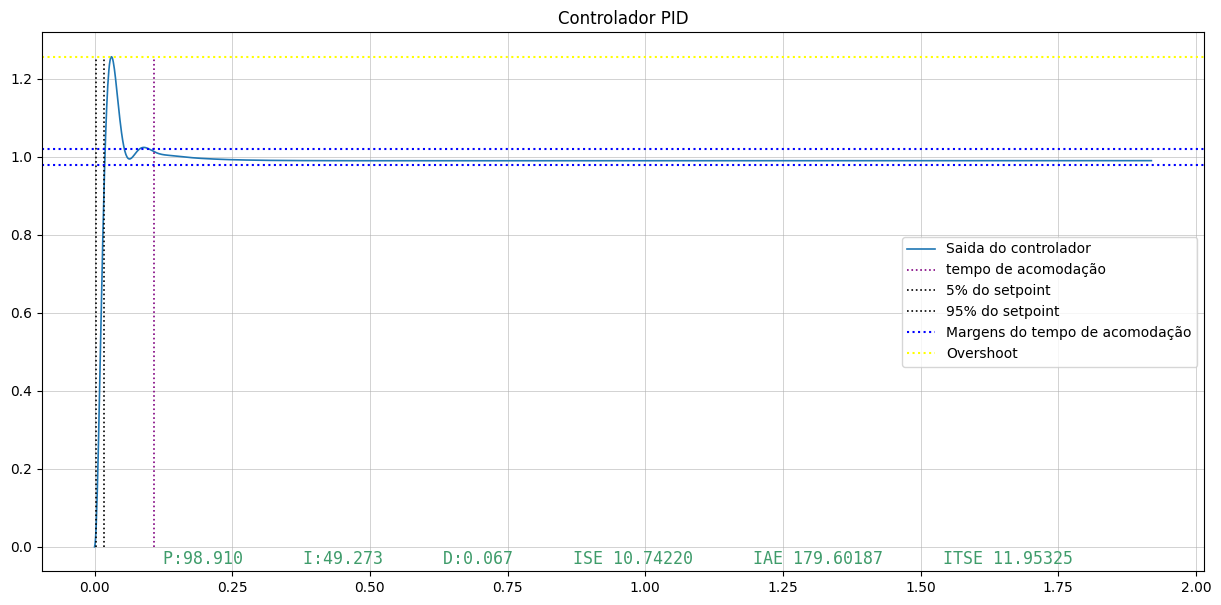

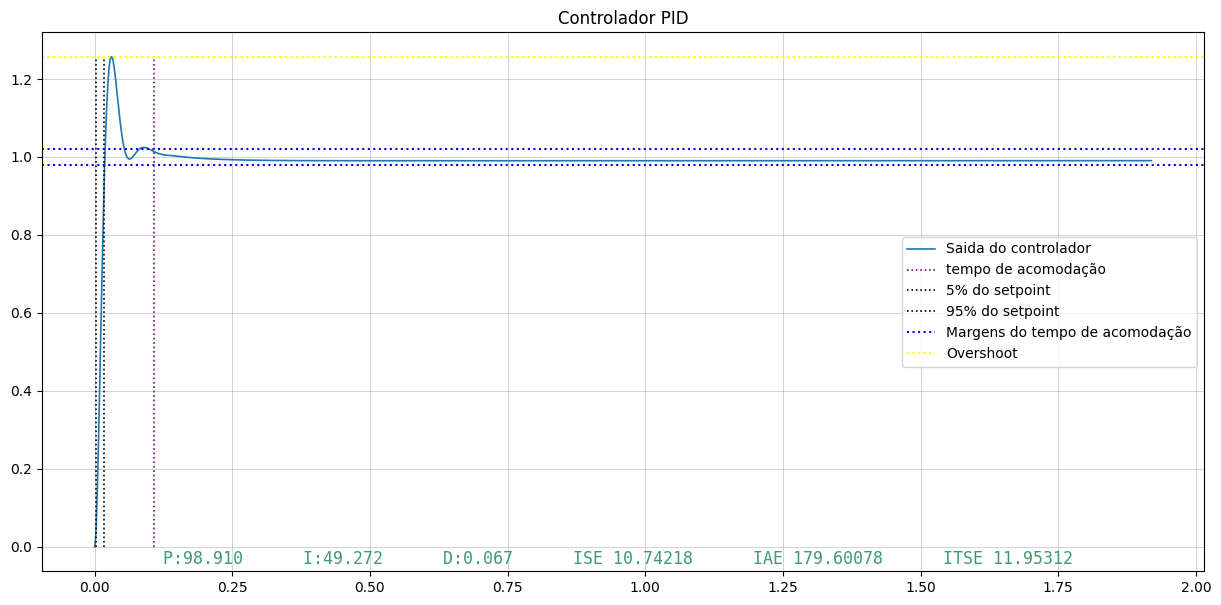

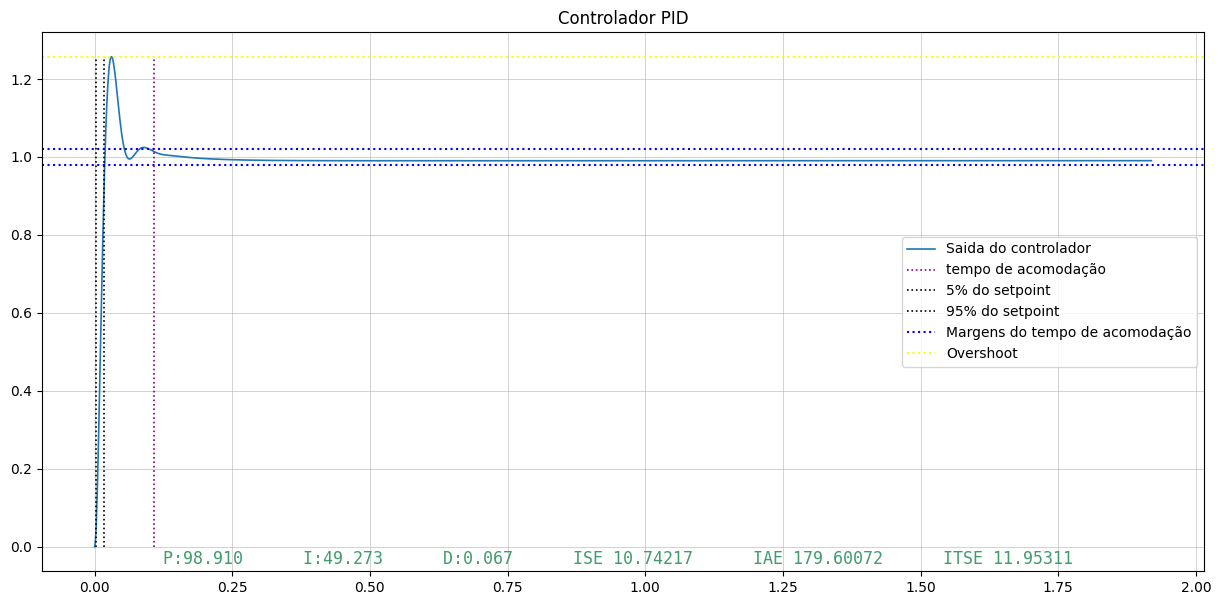

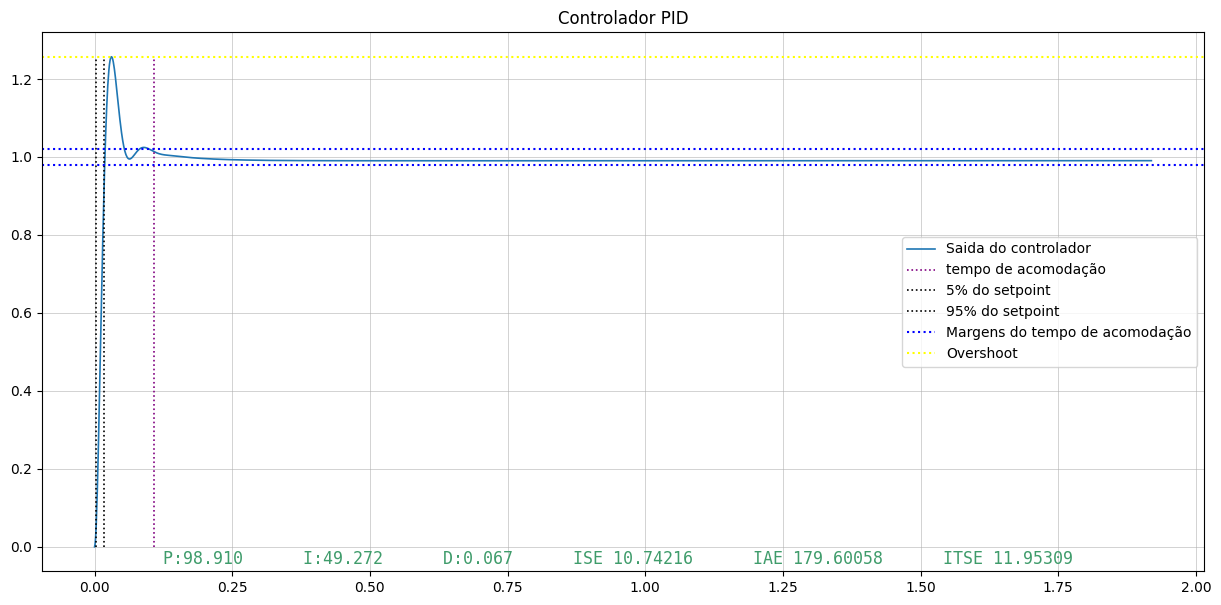

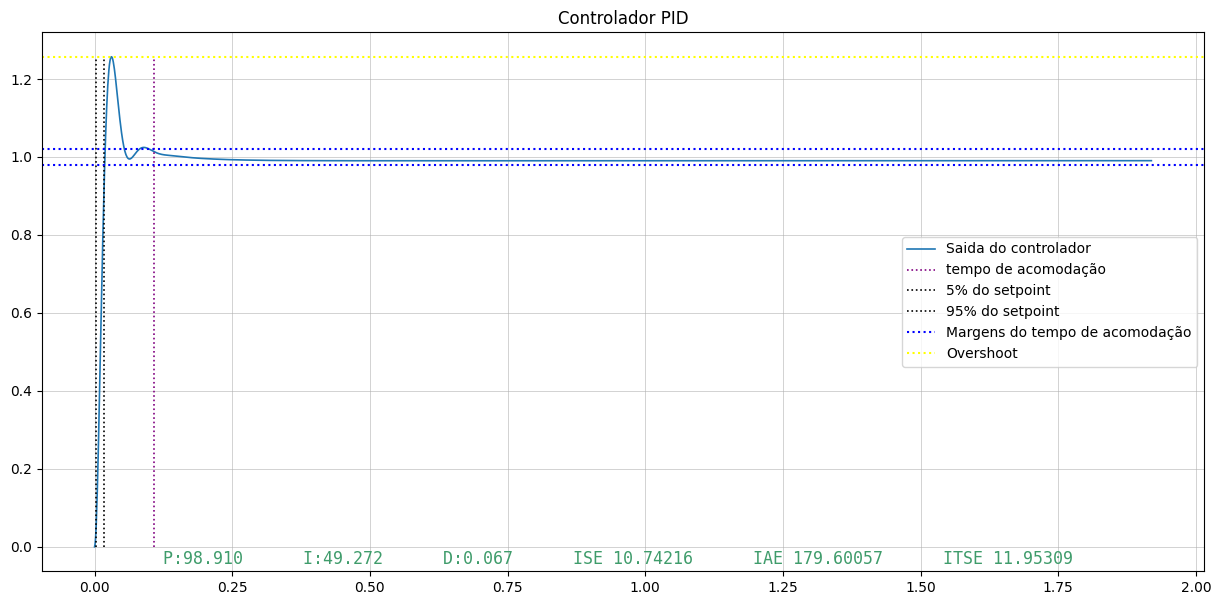

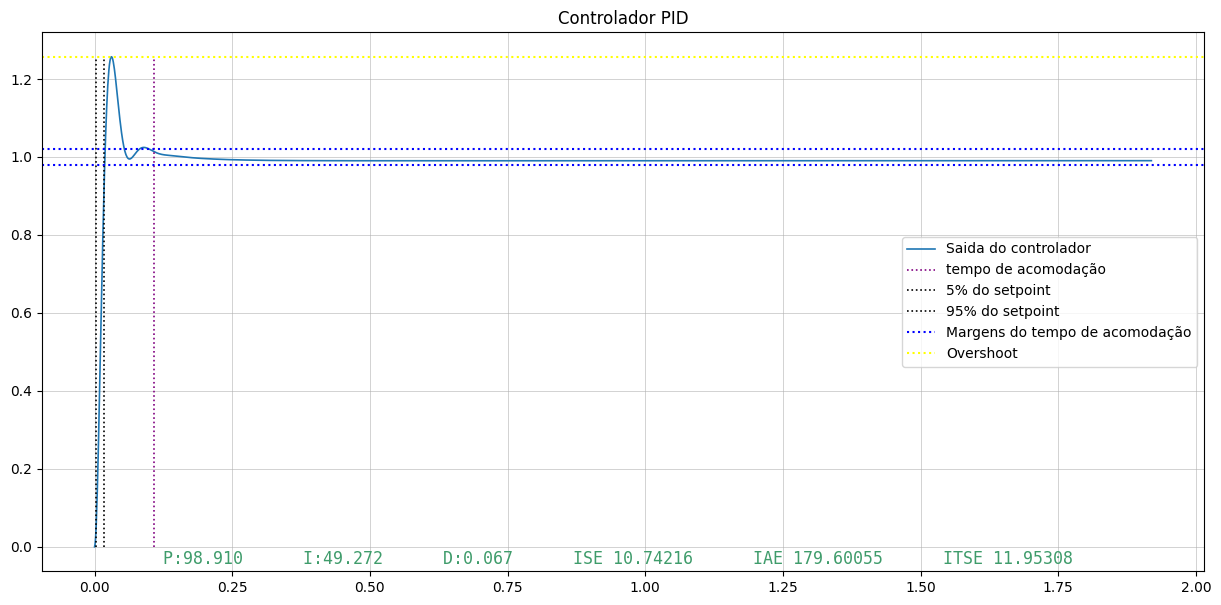

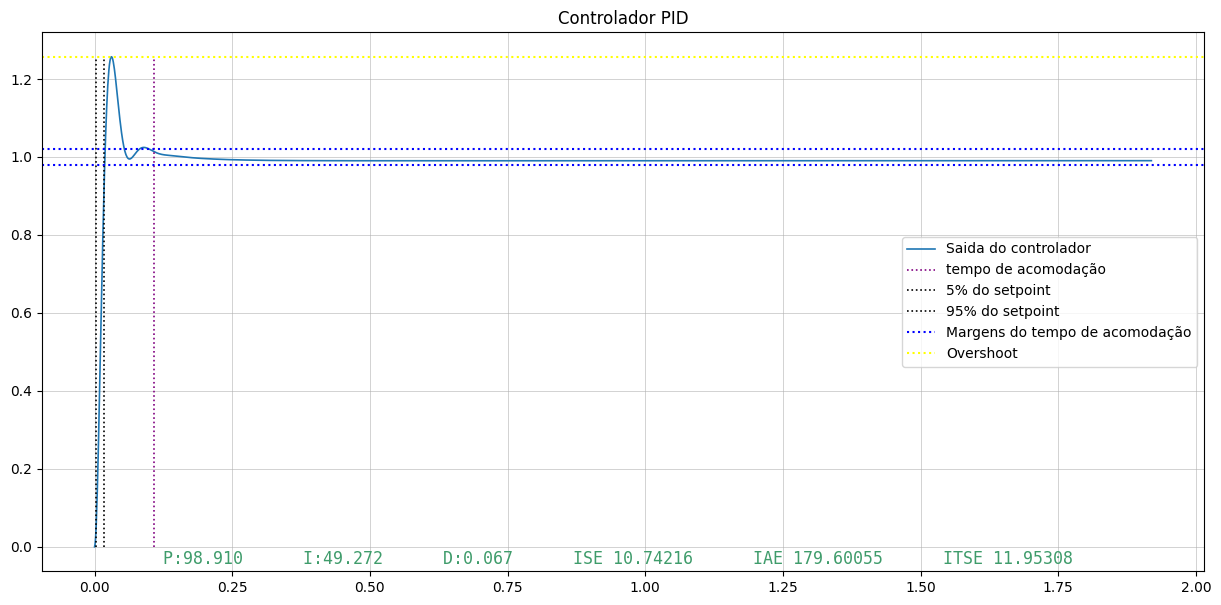

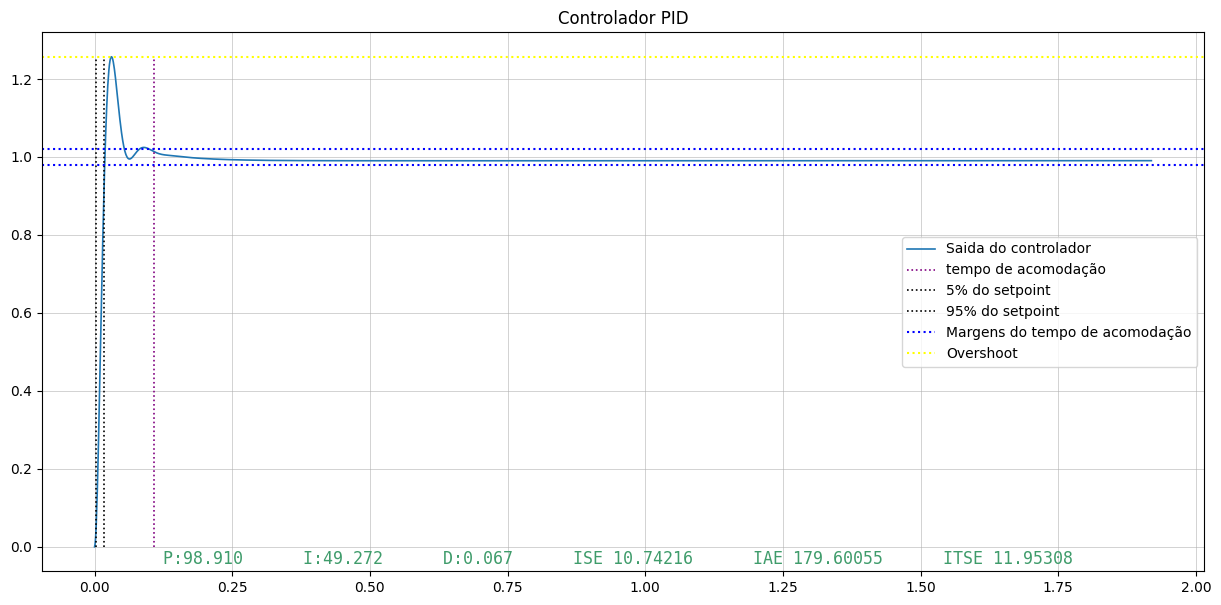

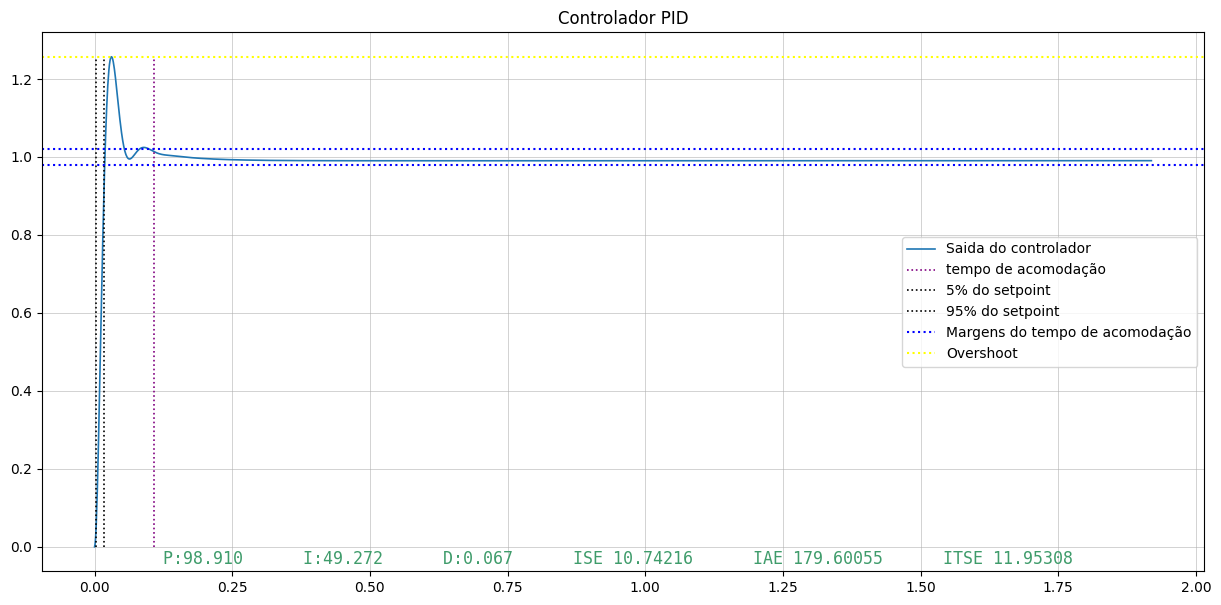

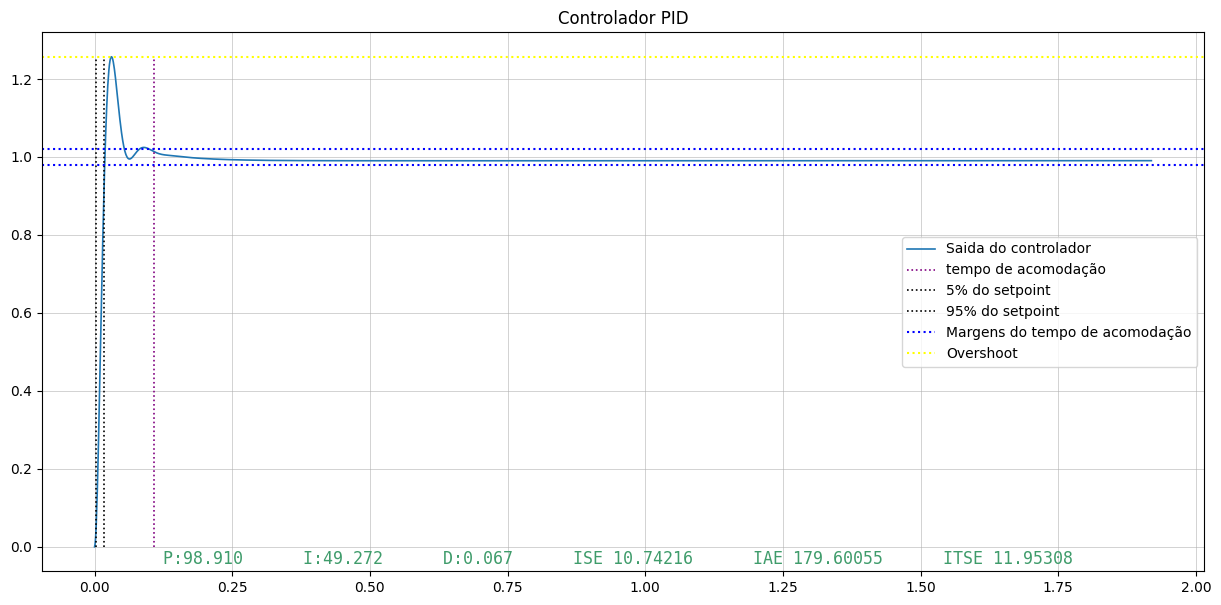

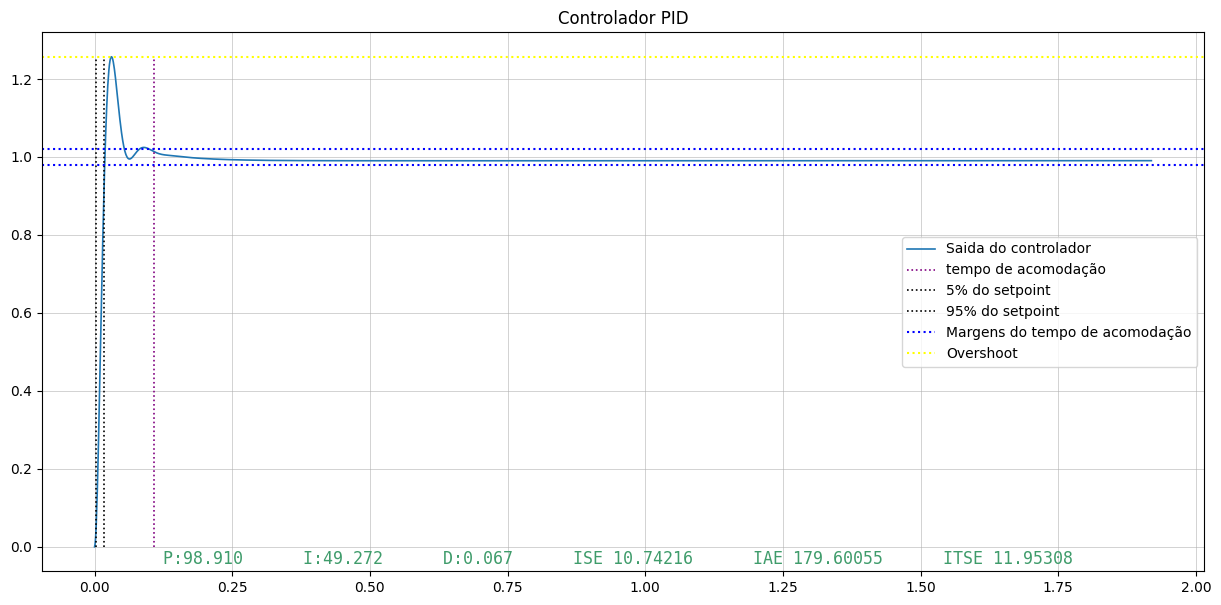

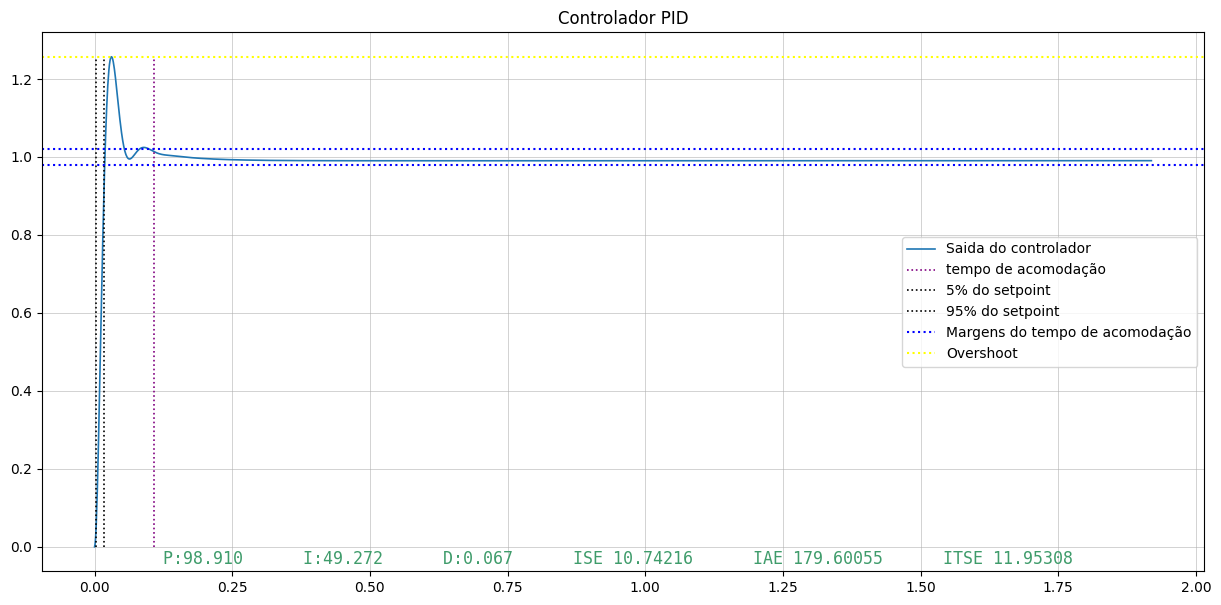

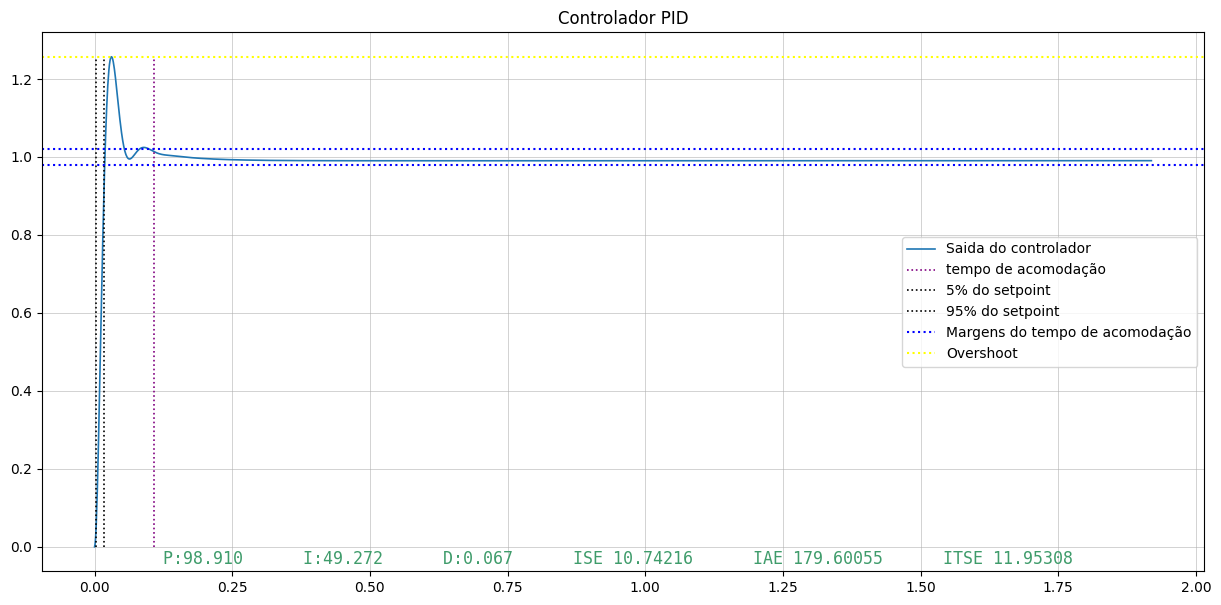

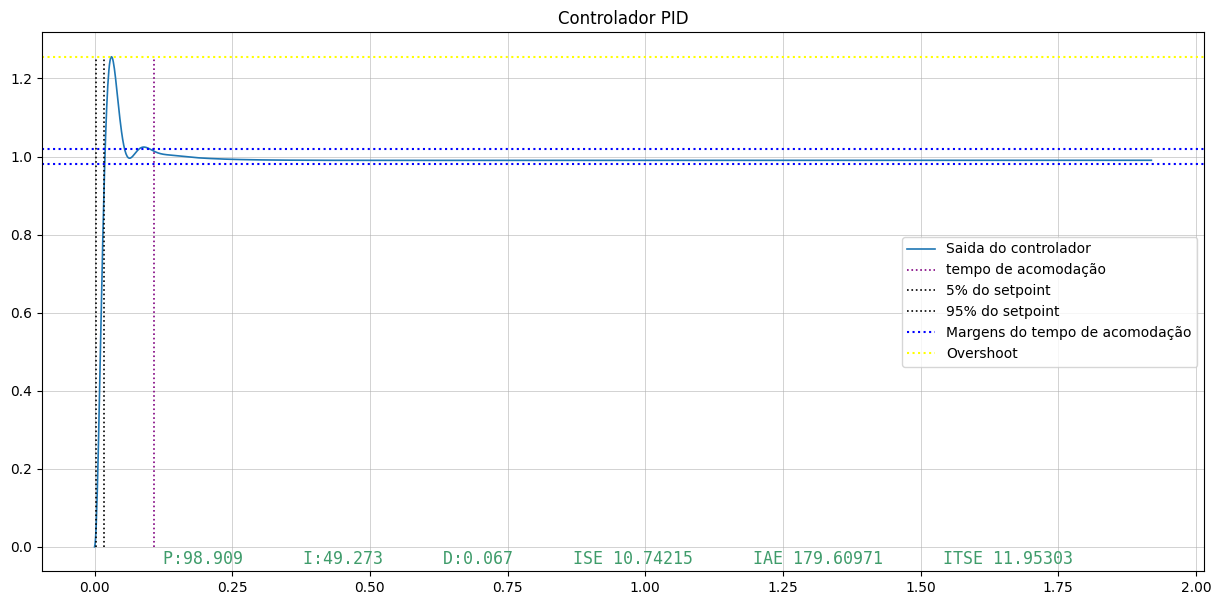

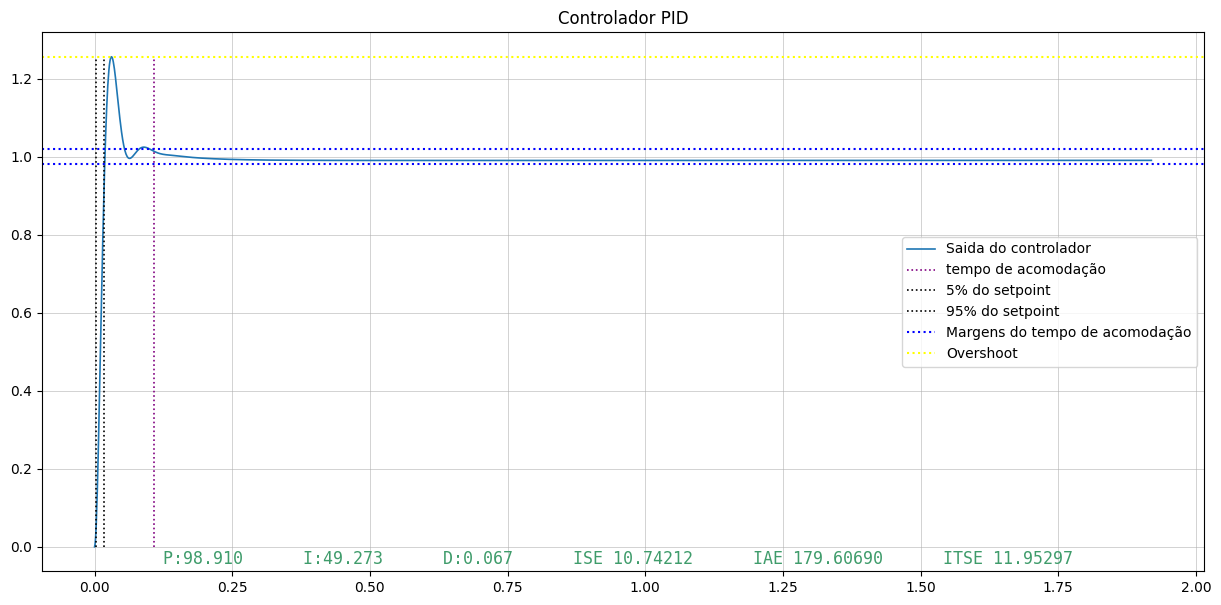

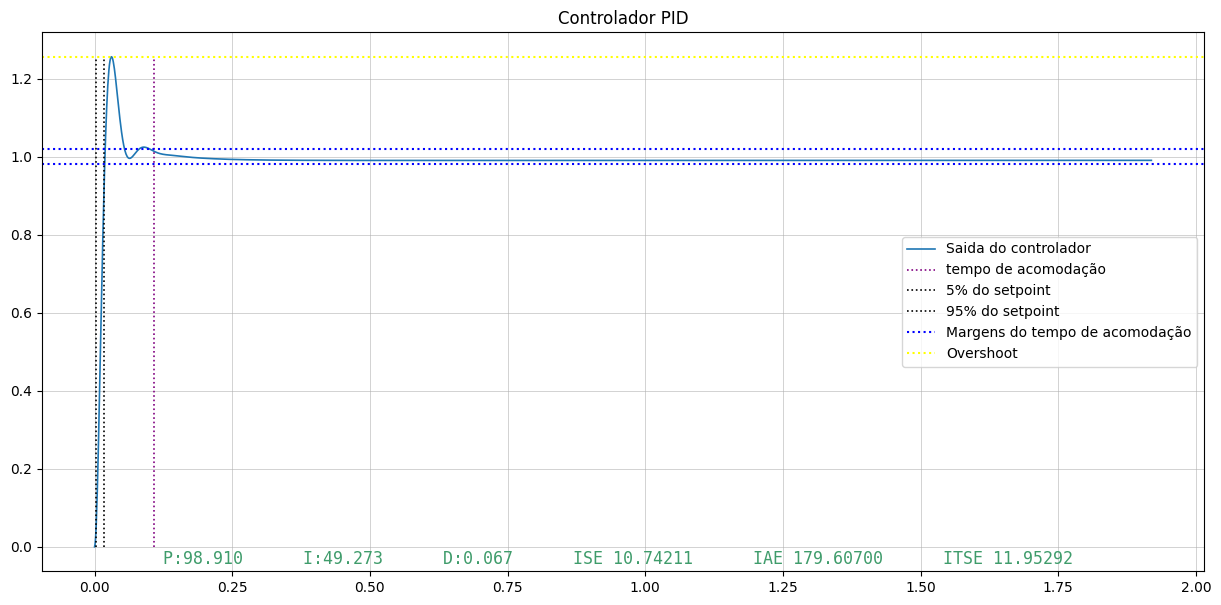

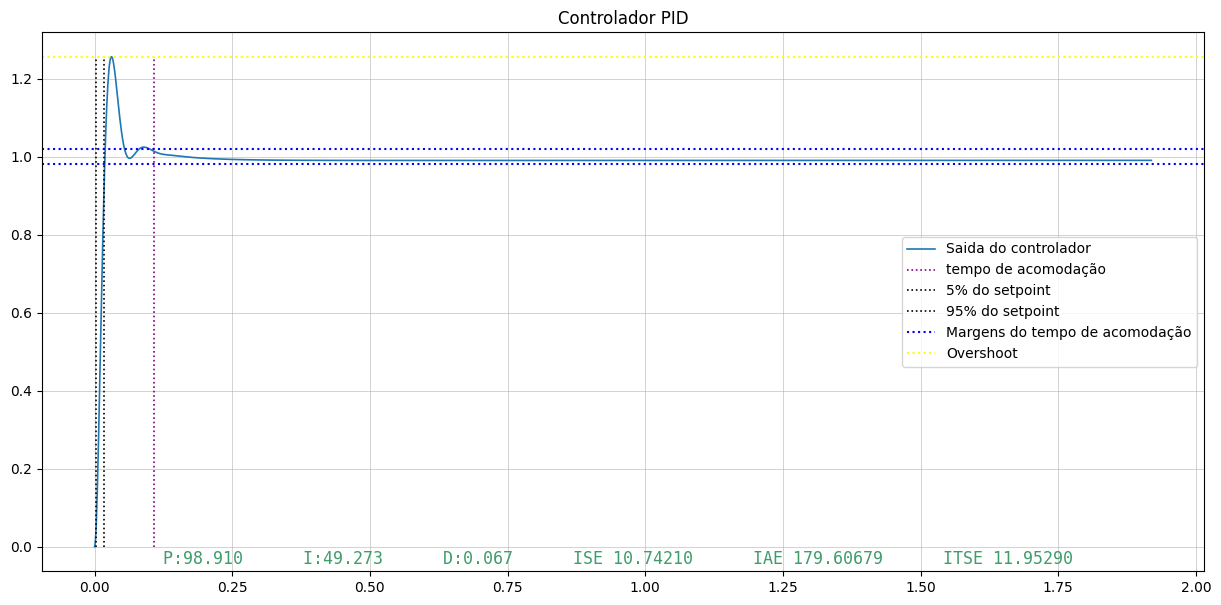

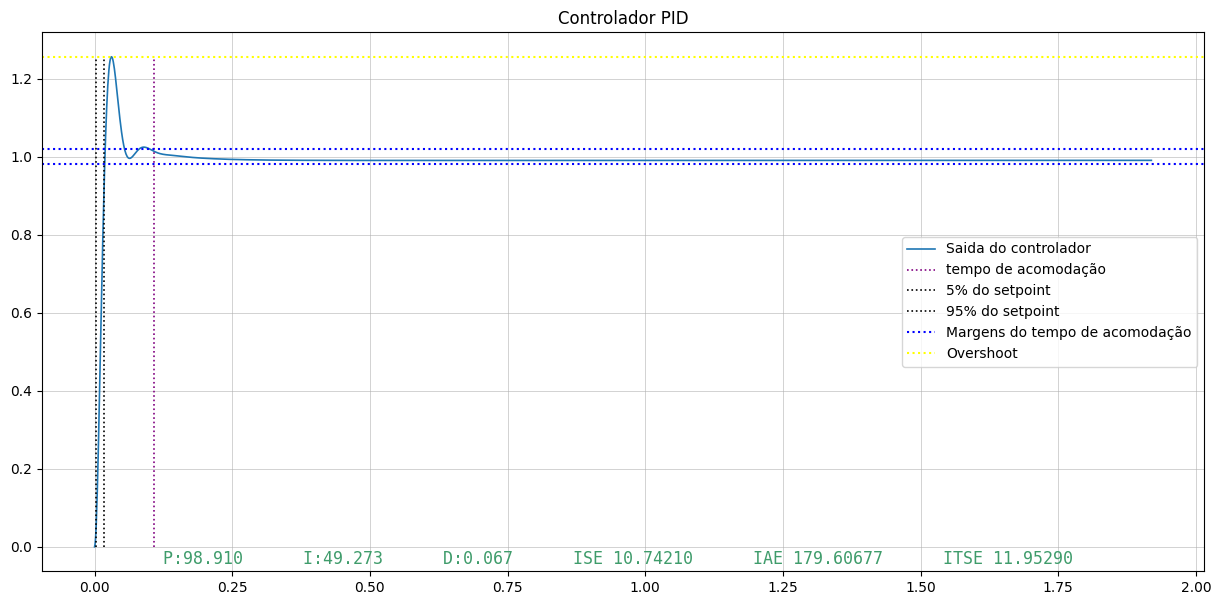

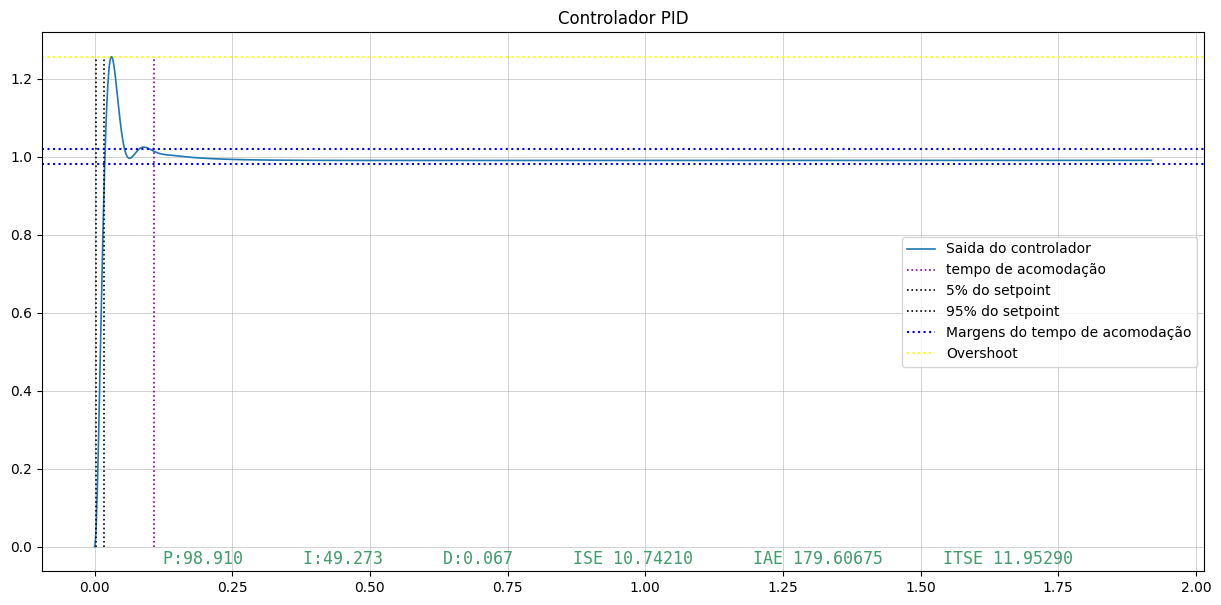


Sem melhoras á 1 iterações



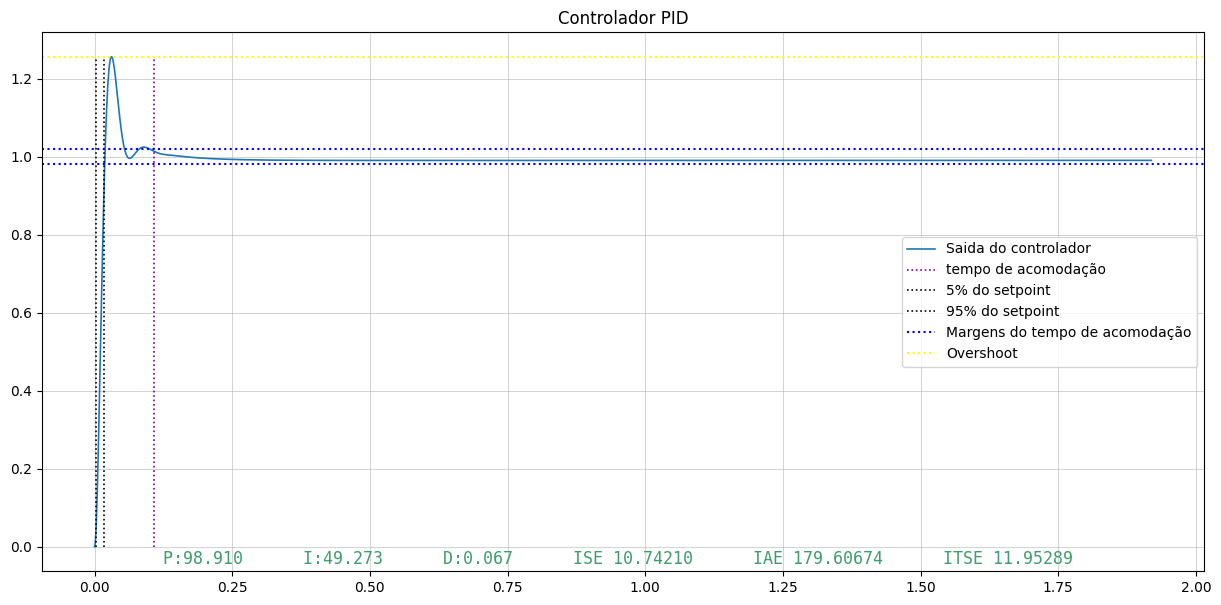


Sem melhoras á 2 iterações



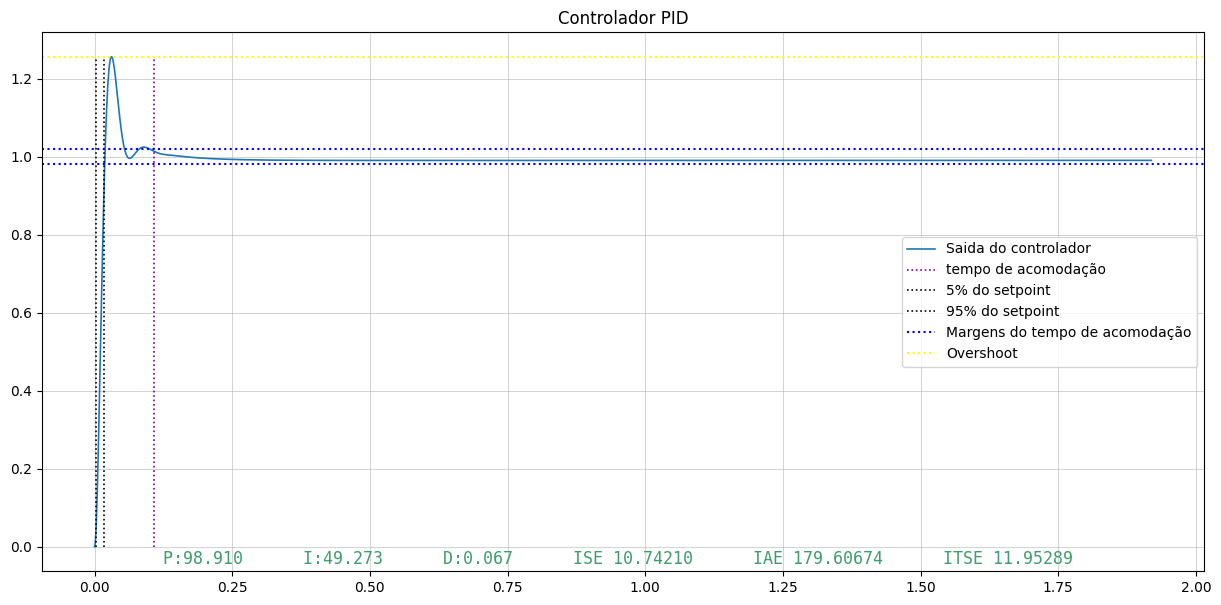


Sem melhoras á 3 iterações



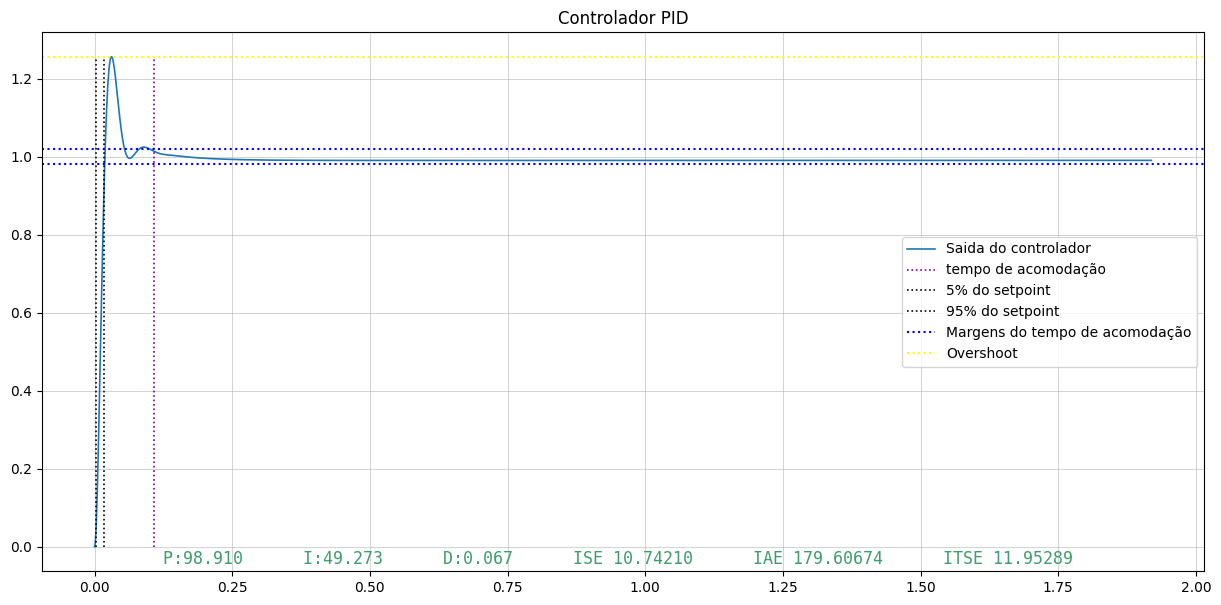


Sem melhoras á 4 iterações



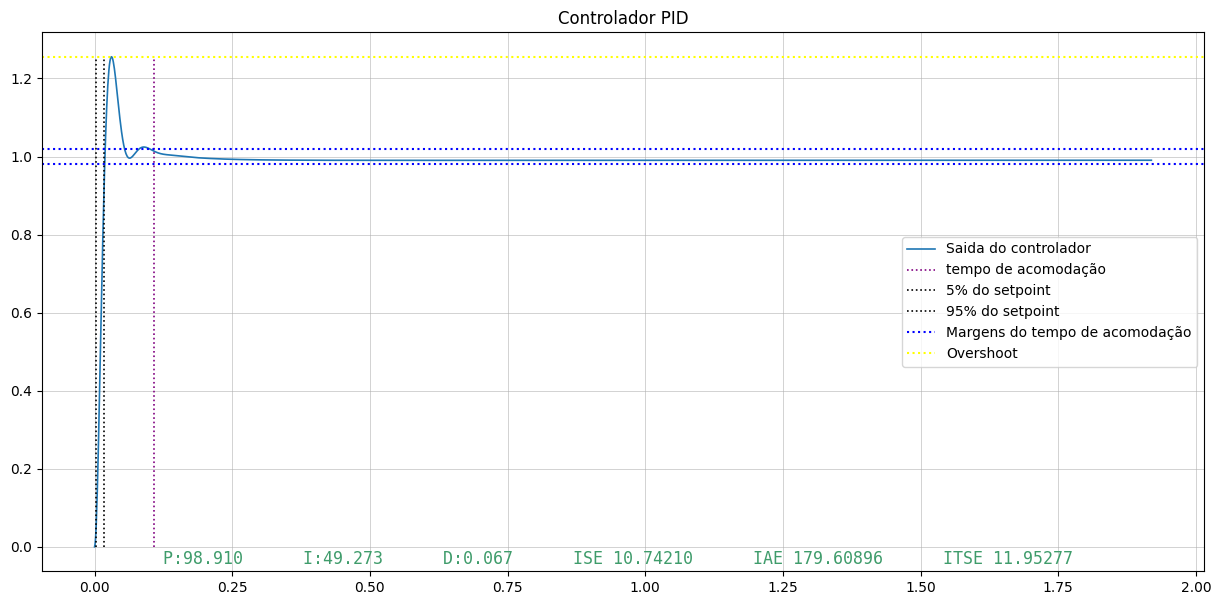


Sem melhoras á 5 iterações

< Critério de parada atingido, o sistemas não teve melhoras significativas a 5 iterações. >
< 54 iterações antes de atingir o critério. >


In [4]:
num = [16]
den = [1,4,16]
set_point = 1.0

pid_param = list()

w = 0.75 # fator de inercia
c1 = 1.0  # fator cognitivo
c2 = 0.5 # fator social
 
n_part = 10 # numero de particulas
parada = 0.001 # critério de parada
dim = 3 # dimensão da entrada 

min = [0.001, 0.001, 0.001] # minimo do sistema
max = [100.0, 100.0, 100.0] # maximo do sistema

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)

sistema = list()

particulas = PSO.inicializate(n_part, dim, min, max)  

sistema = PSO.update_sistem(sistema,particulas,min,max,w,c1,c2,parada,dim,pid_param)

In [5]:
sistema2df(sistema,'C:\\Users\\vitor\\Documents\\GitHub\\IC-IT\\resultados')